# NisAI - Grupo Genesis

## Introdução

O câncer de mama é uma das formas mais comuns de câncer que afeta milhões de mulheres em todo o mundo. Atualmente, os tratamentos "adjuvantes" e "neoadjuvantes" são duas das principais opções terapêuticas disponíveis para pacientes com câncer de mama. No entanto, ainda nos dias atuais, escolher o melhor tipo de tratamento pode ser um desafio para os médicos, pois a escolha depende de diversos fatores.

Neste contexto, o grupo Genesis, composto por alunos do Inteli (Instituto de tecnologia e liderança) em colaboração com a Escola de Medicina da Universidade de São Paulo e o ICESP (Instituto do Câncer do Estado de São Paulo) desenvolveu um modelo preditivo para ajudar os médicos a escolher o melhor tipo de tratamento para o câncer mencionado. O objetivo do projeto foi criar um sistema que utilize informações de pacientes diagnosticados com a enfermidade para fornecer recomendações de tratamento mais personalizadas.

Para alcançar este objetivo, os alunos utilizaram técnicas de análise de dados e aprendizado de máquina para criar um modelo que utiliza informações clínicas para recomendar o melhor tipo de tratamento para cada paciente. O modelo foi treinado e validado usando um grande conjunto de dados de pacientes com câncer de mama, o que permitiu que os alunos otimizassem o desempenho do modelo e avaliassem sua eficácia.

Os resultados do projeto mostram que o modelo preditivo desenvolvido pelos alunos é capaz de fornecer recomendações de tratamento altamente personalizadas para pacientes com câncer de mama. Isso pode ajudar os médicos a escolher a melhor opção terapêutica para cada paciente, o que pode melhorar significativamente a eficácia do tratamento e a qualidade de vida das pacientes. O projeto representa uma importante contribuição para a medicina personalizada e a luta contra o câncer de mama.

## Importação de bibliotecas e ferramentas necessárias

Para iniciar a confecção do modelo, serão primeiramente necessários o carregamento das bibliotecas que serão utilizadas.

As bibliotecas utilizadas serão a **NumPy** e a **Pandas**. A primeira permite, entre outros recursos, o suporte para operações matemáticas em matrizes e vetores multidimensionais de forma eficiente. A biblioteca Pandas promove um conjunto de ferramentas fundamentais para a análise de dados.

In [28]:
# Ferramentas de análise de dados
import pandas as pd
import numpy as np
import plotly.express as px

# Ferramentas de labeling de dados
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Ferramentas para integração do Drive
from google.colab import drive

# Ferramentas de plot de imagem
import plotly.express as px

## Montagem do drive

o Google Drive é montado para que a os dados sejam importados diretamente de um servidor de *cloud*, facilitando a captação de dados e evitando o armazenamento de informações nas maquinas dos integrantes do grupo.

In [29]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Importação das tabelas

As bases de dados armazenadas em arquivos ".csv" são lidas e instanciadas em variáveis para possibilitar o tratamento de dados.

In [30]:
df_demograficos = pd.read_csv('/content/drive/MyDrive/Data/BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922 - BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922genesis.csv')
df_registro_tumo = pd.read_csv('/content/drive/MyDrive/Data/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.csv')
df_histopatologia = pd.read_csv('/content/drive/MyDrive/Data/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.csv')
df_pesoEaltura = pd.read_csv('/content/drive/MyDrive/Data/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.csv')

## Exploração de tabelas

Antes de começar a limpeza dos dados, o grupo se dispôs em análisar todas as tabelas que foram disponibilizados pelo ICESP em conjunto com a Escola de Medicina da USP. Foram utilizado os métodos `info` para analisar as informações gerais de cada tabela.

Além disso, Foi-se criada a função `separa_categorico_numerico` que retorna as colunas das tabelas divindo-as em categóricas e númericas. Após essa distinção, foi possível analisar a estatística descritiva das colunas numéricas com o método `describe`



In [31]:
# Função que retorna uma lista de colunas categóricas ou numéricas
def separa_categorico_numerico(df):
  categoricos = list(df.select_dtypes(include='object').columns)

  retira = []

  if str(df) == str(df_demograficos):
    retira = [
      'Data da última informação sobre o paciente',
      'Data da cirurgia',
      'Data de início do tratamento quimioterapia',
      'Data do início Hormonioterapia adjuvante',
      'Data de início da Radioterapia'
    ]

  elif str(df) == str(df_histopatologia):
    retira = [
      'Receptor de progesterona (quantificação %)',
      'Receptorde Estrogênio (quantificação %)'
    ]
    categoricos.extend(('Grau histológico', 'Subtipo tumoral'))

  elif str(df) == str(df_pesoEaltura):
    retira = ['Data: ']
    

  elif str(df) == str(df_registro_tumo):
    categoricos.append('Código da Morfologia de acordo com o CID-O')
  
  for i in retira:
    if i in df.columns:
      categoricos.remove(i)

  numericos = list(df.drop(categoricos, axis=1))
  
  return {'cat': categoricos, 'num': numericos}

In [32]:
df_demograficos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 48 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                             --------------  -----  
 0   Record ID                                                                                                                          4272 non-null   int64  
 1   Repeat Instrument                                                                                                                  0 non-null      float64
 2   Repeat Instance                                                                                                                    0 non-null      float64
 3   Escolaridade                                                                            

In [33]:
df_registro_tumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 33 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Record ID                                                           8949 non-null   int64  
 1   Repeat Instrument                                                   4677 non-null   object 
 2   Repeat Instance                                                     4677 non-null   float64
 3   Data da primeira consulta institucional [dt_pci]                    4677 non-null   object 
 4   Data do diagnóstico                                                 4677 non-null   object 
 5   Código da Topografia (CID-O)                                        4677 non-null   object 
 6   Código da Morfologia de acordo com o CID-O                          4677 non-null   float64
 7   Estadio Clínico

In [34]:
df_histopatologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9066 entries, 0 to 9065
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Record ID                                   9066 non-null   int64  
 1   Repeat Instrument                           4794 non-null   object 
 2   Repeat Instance                             4794 non-null   float64
 3   Diagnostico primario (tipo histológico)     2954 non-null   object 
 4   Grau histológico                            1467 non-null   float64
 5   Subtipo tumoral                             4695 non-null   float64
 6   Receptor de estrogênio                      4249 non-null   object 
 7   Receptor de progesterona                    4251 non-null   object 
 8   Ki67 (>14%)                                 4022 non-null   object 
 9   Receptor de progesterona (quantificação %)  1890 non-null   object 
 10  Receptorde E

In [35]:
df_pesoEaltura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55654 entries, 0 to 55653
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Record ID                55654 non-null  int64  
 1   Repeat Instrument        51382 non-null  object 
 2   Repeat Instance          51382 non-null  float64
 3   Data:                    51354 non-null  object 
 4   Peso                     45178 non-null  float64
 5   Altura (em centimetros)  49928 non-null  float64
 6   IMC                      51334 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.0+ MB


In [36]:
df_demograficos[separa_categorico_numerico(df_demograficos)['num']].describe()

,Record ID,Repeat Instrument,Repeat Instance,Idade do paciente ao primeiro diagnóstico,Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos [dt_pci],Quantas vezes ficou gráfida?,Número de partos,Idade na primeira gestação,Por quanto tempo amamentou?,Idade da primeira mentruação
count,4272.000000,0.0,0.0,4092.000000,4270.000000,44.000000,2.000000,897.000000,688.000000,1025.000000
mean,48652.360487,NaN,NaN,54.247801,1475.003747,2.318182,1.500000,23.057971,19.043605,12.891707
std,20659.519622,NaN,NaN,13.574088,859.622377,1.410471,0.707107,5.665232,23.105060,2.104446
min,302.000000,NaN,NaN,22.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,31013.000000,NaN,NaN,45.000000,956.250000,1.000000,1.250000,19.000000,6.000000,12.000000
50%,53394.000000,NaN,NaN,54.000000,1282.000000,2.000000,1.500000,22.000000,12.000000,13.000000
75%,65816.750000,NaN,NaN,64.000000,1817.750000,3.000000,1.750000,26.000000,24.000000,14.000000
max,82240.000000,NaN,NaN,98.000000,4503.000000,7.000000,2.000000,53.000000,260.000000,37.000000


In [37]:
df_registro_tumo[separa_categorico_numerico(df_registro_tumo)['num']].describe()

,Record ID,Repeat Instance,Ano do diagnóstico,Tempo desde o diagnóstico até a primeira recidiva
count,8949.000000,4677.000000,4677.000000,1299.000000
mean,48698.290535,1.100919,2014.518495,633.642802
std,20747.807829,0.383125,2.717669,535.389453
min,302.000000,1.000000,2008.000000,0.000000
25%,30923.000000,1.000000,2012.000000,254.000000
50%,53478.000000,1.000000,2015.000000,489.000000
75%,66977.000000,1.000000,2017.000000,867.500000
max,82240.000000,8.000000,2020.000000,3462.000000


In [38]:
df_histopatologia[separa_categorico_numerico(df_histopatologia)['num']].describe()

,Record ID,Repeat Instance,Indice H (Receptorde progesterona),Ki67 (%)
count,9066.000000,4794.000000,592.000000,3867.000000
mean,48865.548754,1.135795,197.089527,36.534264
std,20440.350857,0.635975,98.485299,24.556049
min,302.000000,1.000000,0.000000,0.000000
25%,31383.000000,1.000000,120.000000,18.000000
50%,53990.000000,1.000000,240.000000,30.000000
75%,65140.000000,1.000000,285.000000,50.000000
max,82240.000000,17.000000,300.000000,100.000000


## 1. Limpeza de dados

### 1.1. Remoção de colunas

Algumas colunas foram removidas de antimão por conter pouquíssimos dados ou por não serem relevantes para o tratamento, abaixo foi-se criada uma tabela explicando o motivo pelo qual cada coluna foi deletada.

| Tabela 	| Coluna 	| Motivo de deleção 	|
|---	|---	|---	|
| df_demograficos 	| 'Data da última informação sobre o paciente' 	| Irrelevante para o modelo em questão 	|
| df_demograficos 	| 'Data da cirurgia', 	| Irrelevante para o modelo em questão 	|
| df_demograficos 	| 'Data de início do tratamento quimioterapia', 	| Irrelevante para o modelo em questão 	|
| df_demograficos 	| 'Repeat Instrument', 	| Coluna nula 	|
| df_demograficos 	| 'Repeat Instance', 	| Coluna nula 	|
| df_demograficos 	| 'UF de nascimento do paciente', 	| Dados insuficientes 	|
| df_demograficos 	| 'UF de residência do paciente', 	| Dados insuficientes 	|
| df_demograficos 	| 'Quantas vezes ficou gráfida?', 	| Dados insuficientes 	|
| df_demograficos 	| 'Número de partos', 	| Dados insuficientes 	|
| df_demograficos 	| 'Hormonioterapia ', 	| Dados insuficientes 	|
| df_demograficos 	| 'Amamentou na primeira gestação?', 	| Contemplada em outra coluna mais relevante 	|
| df_demograficos 	| 'Faz uso de métodos contraceptivo?', 	| Contemplada em outra coluna mais relevante 	|
| df_demograficos 	| 'Esquema de hormonioterapia', 	| Dados insuficientes 	|
| df_demograficos 	| 'Data do início Hormonioterapia adjuvante', 	| Dados insuficientes 	|
| df_demograficos 	| 'Data de início da Radioterapia', 	| Irrelevante para o modelo em questão 	|
| df_demograficos 	| 'Radioterapia', 	| Irrelevante para o modelo em questão 	|
| df_demograficos 	| 'Consumo de tabaco', 	| Dados insuficientes 	|
| df_demograficos 	| 'Abortou', 	| Irrelevante para o modelo em questão 	|
| df_demograficos 	| 'Qual método? (choice=não informou)', 	| Irrelevante para o modelo em questão 	|
| df_demograficos 	| 'Qual método? (choice=outros)', 	| Irrelevante para o modelo em questão 	|
| df_demograficos 	| 'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Não)', 	| Contemplada em outra coluna mais relevante 	|
| df_demograficos 	| 'Qual método? (choice=DIU)', 	| Irrelevante para o modelo em questão 	|
| df_demograficos 	| 'Qual método? (choice=camisinha)', 	| Irrelevante para o modelo em questão 	|
| df_demograficos 	| 'Já fez uso de drogas?' 	| Dados insuficientes 	|
| df_demograficos 	| 'Possui histórico familiar de câncer?' 	| Contemplada em outra coluna mais relevante 	|
| df_pesoEaltura 	| 'Repeat Instance' 	| Coluna nula 	|
| df_pesoEaltura 	| 'Repeat Instrument' 	| Coluna nula 	|
| df_registro_tumo 	| 'Repeat Instrument', 	| Coluna nula 	|
| df_registro_tumo 	| 'Repeat Instance', 	| Coluna nula 	|
| df_registro_tumo 	| 'Data do tratamento', 	| Irrelevante para o modelo em questão 	|
| df_registro_tumo 	| 'Data de Recidiva' 	| Irrelevante para o modelo em questão 	|


In [39]:
df_demograficos = df_demograficos.drop([
    'Data da última informação sobre o paciente',
    'Data da cirurgia',
    'Data de início do tratamento quimioterapia',
    'Repeat Instrument', 
    'Repeat Instance',
    'UF de nascimento do paciente',
    'UF de residência do paciente',
    'Quantas vezes ficou gráfida?',
    'Número de partos',
    'Hormonioterapia ',
    'Amamentou na primeira gestação?',
    'Faz uso de métodos contraceptivo?',
    'Esquema de hormonioterapia',
    'Data do início Hormonioterapia adjuvante',
    'Data de início da Radioterapia',
    'Radioterapia',
    'Consumo de tabaco',
    'Abortou',
    'Qual método? (choice=não informou)',
    'Qual método? (choice=outros)',
    'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Não)',
    'Qual método? (choice=DIU)',
    'Qual método? (choice=camisinha)',
    'Já fez uso de drogas?',
    'Possui histórico familiar de câncer?'
], axis=1)

In [40]:
df_pesoEaltura = df_pesoEaltura.drop([
  'Repeat Instance',
  'Repeat Instrument'
], axis=1)

In [41]:
df_registro_tumo = df_registro_tumo[[
  'Record ID',
  'Código da Topografia (CID-O)',
  'Código da Morfologia de acordo com o CID-O',
  'Estadio Clínico  ',
  'Grupo de Estadio Clínico',
  'Classificação TNM Clínico - T',
  'Classificação TNM Clínico - N',
  'Classificação TNM Clínico - M',
  'Combinação dos Tratamentos Realizados no Hospital',
  'Ano do diagnóstico',
  'Lateralidade do tumor',
  'Descrição da Morfologia de acordo com o CID-O  (CID-O - 3ª edição)',
  'Descrição da Topografia ',
  'Com recidiva à distância',
  'Com recidiva regional',
  'Com recidiva local'
]]

In [42]:
df_histopatologia = df_histopatologia.drop([
  'Repeat Instrument', 
  'Repeat Instance'
], axis=1)

### 1.2. Renomeação de colunas

As colunas foram renomeadas para manter o mesmo padrão entre tabelas e para a melhor identificação. Após modificar os nomes das colunas, a lista que contêm as categóricas e numéricas foram instânciadas em um dicionário para que antes do [Data Labeling](#scrollTo=Sk6FbHA0q7pK), a identificação do tipo das colunas ainda seja possível usando funções produzidas anteriormente

In [43]:
df_demograficos = df_demograficos.rename(columns={
  "Record ID": "record_id",
  "Atividade Física": "atividade_fisica",
  "Escolaridade": "escolaridade",
  "Idade do paciente ao primeiro diagnóstico": "idade_diagnostico", 
  "Raça declarada (Biobanco)": "raca",
  "Sexo": "sexo",
  "Última informação do paciente": "ultima_informacao_paciente",
  "Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]": "tempo_seguimento",
  "Já ficou grávida?": "ja_gravida",
  "Idade na primeira gestação": "gestacao_idade",
  "Consumo de álcool": "consumo_alcool",
  "Grau de parentesco de familiar com cancer? (choice=primeiro (pais, irmãos, filhos))": "grau_parentesco_primeiro",
  "Grau de parentesco de familiar com cancer? (choice=segundo (avós, tios e netos))": "grau_parentesco_segundo",
  "Grau de parentesco de familiar com cancer? (choice=terceiro (bisavós, tio avós, primos, sobrinhos))": "grau_parentesco_terceiro",
  "Regime de Tratamento": "tratamento",
  "Tipo de terapia anti-HER2 neoadjuvante": "anti_her2_neoadjuvante",
  "Por quanto tempo amamentou?": "tempo_amamentacao",
  "Idade da primeira mentruação": "idade_primeira_menstruacao",
  'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, apenas 1 caso)': "grau_parentesco_mama_primeiro_1_vez",
  'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, mais de 1 caso)': "grau_parentesco_mama_primeiro_mais_vezes",
  'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, apenas 1 caso)': "grau_parentesco_mama_segundo_1_vez",
  'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, mais de 1 caso)': "grau_parentesco_mama_segundo_mais_vezes",
  'Qual método? (choice=Pílula anticoncepcional)': "uso_anticoncepcional"
})

In [44]:
df_pesoEaltura = df_pesoEaltura.rename(columns={
  "Record ID": "record_id",
  "Data: ": "data",
  "Peso": "peso",
  "Altura (em centimetros)": "altura"
})

In [45]:
df_histopatologia = df_histopatologia.rename(columns={
  "Record ID": "record_id",
  "Grau histológico": "grau_histologico", 
  "Subtipo tumoral": "subtipo_tumoral",
  "Receptor de estrogênio": "receptor_estrogenio",
  "Receptor de progesterona": "receptor_progesterona",
  "Ki67 (>14%)": "ki67",
  "HER2 por IHC": "her2_ihc",
  "Diagnostico primario (tipo histológico)": "primeiro_diagnostico",
  "HER2 por FISH": "her2_fish"
})

In [46]:
df_registro_tumo = df_registro_tumo.rename(columns={
  "Record ID" : "record_id",
  "Código da Topografia (CID-O)": "cid_o", 
  "Código da Morfologia de acordo com o CID-O": "morfologia_cid_o",
  "Estadio Clínico  ": "estadio_clinico",
  "Grupo de Estadio Clínico": "grupo_estadio_clinico",
  "Metastase ao DIAGNOSTICO - CID-O #4 ": "metastase_cido4",
  "Classificação TNM Clínico - M": "classificacao_tnm_m",
  "Classificação TNM Clínico - N": "classificacao_tnm_n",
  "Com recidiva à distância": "recidiva_distancia",
  "Com recidiva regional": "recidiva_regional",
  "Com recidiva local": "recidiva_local",
  "Combinação dos Tratamentos Realizados no Hospital": "combinacao_tratamentos",
  "Lateralidade do tumor": "lateralidade_tumor",
  "Tempo desde o diagnóstico até a primeira recidiva  ": "tempo_diagnostico",
  "Descrição da Morfologia de acordo com o CID-O  (CID-O - 3ª edição)": "descricao_morfologia",
  "Descrição da Topografia ": "descricao_topografia",
  "Metastase ao DIAGNOSTICO - CID-O #1": "metastase_cid1",
  "Metastase ao DIAGNOSTICO - CID-O #2": "metastase_cid2",
  "Metastase ao DIAGNOSTICO - CID-O #3": "metastase_cid3",
  "Metastase ao DIAGNOSTICO - CID-O #4": "metastase_cid4",
  'Classificação TNM Clínico - T': 'classificacao_tnm_t',
  "Ano do diagnóstico": 'ano_diagnostico',

})

In [47]:
# Redefinição da função 'separa_categorico_numerico'
def new_separa_categorico_numerico(df):
  
  categoricos = list(df.select_dtypes(include='object').columns)

  retira = []

  if str(df) == str(df_histopatologia):
    retira = [
      'Receptor de progesterona (quantificação %)',
      'Receptorde Estrogênio (quantificação %)'
    ]
    categoricos.extend(("grau_histologico", "subtipo_tumoral"))

  elif str(df) == str(df_pesoEaltura):
    retira = ['Data: ']
    

  elif str(df) == str(df_registro_tumo):
    retira = [
      'data_primeira_consulta',
      'data_diagnostico'
    ]
    categoricos.append('morfologia_cid_o')
    
  
  for i in retira:
    if i in df.columns:
      categoricos.remove(i)

  numericos = list(df.drop(categoricos, axis=1))
  
  return {'cat': categoricos, 'num': numericos}

separa_categorico_numerico = new_separa_categorico_numerico
del new_separa_categorico_numerico

In [48]:
# Instancia as colunas numéricas e categóricas antes do labeling

df_demograficos_categoricos = separa_categorico_numerico(df_demograficos)['cat']
df_demograficos_numericos = separa_categorico_numerico(df_demograficos)['num']
  
df_histopatologia_categoricos = separa_categorico_numerico(df_histopatologia)['cat']
df_histopatologia_numericos = separa_categorico_numerico(df_histopatologia)['num']

df_pesoEaltura_categoricos = separa_categorico_numerico(df_pesoEaltura)['cat']
df_pesoEaltura_numericos = separa_categorico_numerico(df_pesoEaltura)['num']

df_registro_tumo_categoricos = separa_categorico_numerico(df_registro_tumo)['cat']
df_registro_tumo_numericos = separa_categorico_numerico(df_registro_tumo)['num']

dicio_colunas =  {
  'demograficos': [df_demograficos_categoricos, df_demograficos_numericos],
  'histopatologia': [df_histopatologia_categoricos, df_histopatologia_numericos],
  'pesoEaltura': [df_pesoEaltura_categoricos, df_pesoEaltura_numericos],
  'registro_tumo': [df_registro_tumo_categoricos, df_registro_tumo_numericos]
}

### 1.3. Labeling dos valores categóricos

Foi-se criado uma função `ordinal_encode`

In [49]:
# Função que recebe dataframe e retorna outro dataframe com os valores categóricos encoded 
def ordinal_encode(df, labels):
  
  new_df = df.copy(deep=True)
  
  for col in labels:
    enc = OrdinalEncoder(categories=labels[col])
    new_df[col] = enc.fit_transform(new_df[[col]])

  return new_df

In [50]:
# Dicionários que mostram a ordem de input para o encoding ordinal

labels_demograficos = {
  'escolaridade': [['ANALFABETO', 'ENS. FUNDAMENTAL INCOMPLETO', 'ENS. FUNDAMENTAL COMPLETO', 'ENSINO MÉDIO', 'SUPERIOR', 'IGNORADA', np.nan]],
  'raca': [['Negro', 'Pardo', 'Asiático', 'Branco', 'Outro', np.nan]],
  'sexo': [['Feminino', 'Masculino', np.nan]],
  'consumo_alcool': [['Nunca bebeu', 'Bebia no passado', 'Bebe atualmente', 'não-informado', np.nan]],
  'ultima_informacao_paciente': [['Obito por câncer', 'Óbito por outras causas, SOE', 'Vivo, com câncer', 'Vivo, SOE', np.nan]],
  'tratamento': [['Terapia Adjuvante', 'Terapia Neoadjuvante', 'Paliativo', 'Não fez quimioterapia', np.nan]],
  'anti_her2_neoadjuvante': [['Trastuzumabe', 'Trastuzumabe + Pertuzumabe', np.nan]],
  'atividade_fisica': [['Não pratica', 'Pratica esporadicamente', 'Pratica regularmente', 'Pratica frequentemente', np.nan]],
  'grau_parentesco_mama_primeiro_1_vez': [['Unchecked', 'Checked', np.nan]],
  'grau_parentesco_mama_primeiro_mais_vezes': [['Unchecked', 'Checked', np.nan]],
  'grau_parentesco_mama_segundo_1_vez': [['Unchecked', 'Checked', np.nan]],
  'grau_parentesco_mama_segundo_mais_vezes': [['Unchecked', 'Checked', np.nan]],
  'uso_anticoncepcional': [['Unchecked', 'Checked', np.nan]],
  'grau_parentesco_primeiro': [['Unchecked', 'Checked', np.nan]],
  'grau_parentesco_segundo': [['Unchecked', 'Checked', np.nan]],
  'grau_parentesco_terceiro': [['Unchecked', 'Checked', np.nan]],
  'ja_gravida': [['Não', 'Sim', np.nan]]
}

labels_histopatologia = {
  "primeiro_diagnostico": [[
    "Carcinoma mamário invasivo multifocal",
    "Adenomioepitelioma maligno",
    "Carcinoma lobular pleomórfico",
    "Carcinoma de mama lobular in situ",
    "Carcinoma de mama micropapilar",
    "NÃO-ESPECIAL - Carcinoma de mama ductal invasivo (CDI)/SOE",
    "Tumor PHYLLODES maligno",
    "Carcinoma de mama lobular invasivo",
    "Carcinoma de mama misto (ductal e micropapilífero) invasivo",
    "Carcinoma de mama misto (ductal e lobular) invasivo", 
    "outros",
    "Carcinoma de mama tubular",
    "Carcinoma de mama papilifero",
    "Carcinoma de mama mucinoso",
    "Carcinoma de mama cistico adenoide",
    "CARCINOMA MAMÁRIO INVASIVO DO TIPO APÓCRINO",
    "Carcinoma de mama medular",
    "Carcinoma de mama metaplasico", 
    np.nan
  ]],
  "receptor_estrogenio": [["negativo", "positivo", "não realizado", np.nan]], 
  "receptor_progesterona": [["negativo", "positivo", "inconclusivo", "não realizado", np.nan]],
  "ki67": [["negativo", "positivo", "inconclusivo", "não realizado", np.nan]],
  "her2_ihc": [["0 (negativo)", " + (negativo)", " ++ (duvidoso)", " +++ (positivo)", "indeterminado", np.nan]],
  "her2_fish": [["sem amplificação", "amplificado", "duvidoso", "reação não funcionou", "não realizado", np.nan]]
}

labels_registro_tumo = {
    "grupo_estadio_clinico": ["0", "I", "II", "III", "III", "IV", "Y: Na", "X - nao foi possivel determinar"],
    "lateralidade_tumor": ["Esquerda", "Direita", "não se aplica", "Bilateral"], 
    "combinacao_tratamentos": ["Cirurgia + Radio + Quimio + Hormonio", "Cirurgia + Quimioterapia","Outras combinações", "Cirurgia + Radio + Quimio", "Cirurgia + Radioterapia","Quimioterapia", "Radioterapia + Quimioterapia", "Nenhum tratamento", "Radioterapia","Cirurgia"],
    "classificacao_tnm_m": ["0", "1", "Y: Na", "X - nao foi possivel determinar", "1B", "1A"],
    "classificacao_tnm_n": ["0","1","2","3","1A","2A","3A","1B","2B","3B","3C","X - nao foi possivel determinar","Y: Na"],
    "classificacao_tnm_t_patologico": ["2","1C","3","1","1B","4B","IV","IS","4D","1MIC","Y: Na","2C","1A","4A","4C"],
    "classificacao_tnm_n_patologico": ["0", "1", "2", "3", "2A", "3A", "3B", "3C", "Y: Na", "X - nao foi possivel determinar","9", "10", "11"],
    "recidiva_distancia": ["Não", "Sim"],
    "recidiva_regional": ["Não", "Sim"],
    "recidiva_local": ["Não", "Sim"],
    'metastase_cid1': [
      'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações',
      'C34 - Bronquios e Pulmoes',
      'C22 - Fígado e Das Vias Biliares Intra-hepáticas',
      'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos',
      'C71 - Encefalo',
      'C40 - Ossos e Cartilagens Articulares Dos Membros',
      'C49 - Tecido Conjuntivo e de Outros Tecidos Moles',
      'C38 - Coração, Mediastino e Pleura,',
      'C56 - Ovario',
      'C15 - Esofago',
      'C44 - Pele nao-melanoma',
      'C48 - Tecidos Moles do Retroperitônio e do Peritônio',
      'C74 - Glândula Supra-renal (Glândula Adrenal)',
      'C42 - Sistema hematopoiético e reticuloendotelial',
      'C18 - Colon,',
      'C67 - Bexiga'
    ],
    'metastase_cid2': [ 
      'C22 - Fígado e Das Vias Biliares Intra-hepáticas',
      'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos',
      'C34 - Bronquios e Pulmoes',
      'C40 - Ossos e Cartilagens Articulares Dos Membros',
      'C71 - Encefalo',
      'C50 - Mama',
      'C38 - Coração, Mediastino e Pleura,',
      'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações',
      'C74 - Glândula Supra-renal (Glândula Adrenal)',
      'C49 - Tecido Conjuntivo e de Outros Tecidos Moles',
      'C44 - Pele nao-melanoma',
      'C75 - Outras Glândulas Endócrinas e de Estruturas Relacionadas',
      'C48 - Tecidos Moles do Retroperitônio e do Peritônio',
      'C70 - Meninges',
      'C25 - Pancreas',
      'C07 - Glandula Parotida',
      'C56 - Ovario'
    ],
    'metastase_cid3': [
    'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos',
    'C64 - Rim, Exceto Pelve Renal',
    'C22 - Fígado e Das Vias Biliares Intra-hepáticas',
    'C71 - Encefalo',
    'C48 - Tecidos Moles do Retroperitônio e do Peritônio',
    'C38 - Coração, Mediastino e Pleura,',
    'C34 - Bronquios e Pulmoes',
    'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações',
    'C40 - Ossos e Cartilagens Articulares Dos Membros',
    'C49 - Tecido Conjuntivo e de Outros Tecidos Moles',
    'C16 - Estomago',
    'C42 - Sistema hematopoiético e reticuloendotelial',
    'C74 - Glândula Supra-renal (Glândula Adrenal)',
    'C25 - Pancreas'
    ],
    'metastase_cid4': [
    'C38 - Coração, Mediastino e Pleura,',
    'C22 - Fígado e Das Vias Biliares Intra-hepáticas',
    'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos',
    'C48 - Tecidos Moles do Retroperitônio e do Peritônio',
    'C75 - Outras Glândulas Endócrinas e de Estruturas Relacionadas',
    'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações',
    'C56 - Ovario',
    'C34 - Bronquios e Pulmoes',
    'C49 - Tecido Conjuntivo e de Outros Tecidos Moles',
    'C40 - Ossos e Cartilagens Articulares Dos Membros',
    'C71 - Encefalo',
    'C67 - Bexiga',
    'C74 - Glândula Supra-renal (Glândula Adrenal)'
    ]
}

In [51]:
labeled_demograficos = ordinal_encode(df_demograficos, labels_demograficos)
labeled_histopatologia = ordinal_encode(df_histopatologia, labels_histopatologia)

In [52]:
labeled_registro_tumo = df_registro_tumo.copy(deep=True)
df_registro_tumo_categoricos.remove('morfologia_cid_o')


for col in df_registro_tumo_categoricos:
  le = LabelEncoder()
  print(col)
  labeled_registro_tumo[col] = le.fit_transform(labeled_registro_tumo[[col]])

df_registro_tumo_categoricos.append('morfologia_cid_o')

cid_o
estadio_clinico
grupo_estadio_clinico
classificacao_tnm_t
classificacao_tnm_n
classificacao_tnm_m
combinacao_tratamentos
lateralidade_tumor
descricao_morfologia
descricao_topografia
recidiva_distancia


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

recidiva_regional
recidiva_local


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 1.4. Lidando com dados ruidosos

#### 1.4.1 Dados demográficos

#### 1.4.2 Dados peso e altura
Explicar bloco

In [55]:
df_novo = pd.DataFrame()

# Seleção de primeira e ultima instância de cada ID
for i in df_pesoEaltura['record_id'].unique():
  df_query = df_pesoEaltura.query(f'record_id == {i}')
  df_query = df_query.sort_values(by='data')

  df_row_first = df_query.iloc[0]

  if len(df_query) > 1:
    df_row_second = df_query.iloc[1]

    numero = len(df_query) - 1

    for col in ['altura', 'peso', 'IMC']:
      while (not pd.isna(df_row_second[col].all())) and (not pd.isna(df_row_second['data'])) and (numero > 1):
        df_row_second = df_query.iloc[len(df_query) - numero]
        numero -= 1

    # Criação de novas colunas com última instância
    df_row_first['ultimo_peso'] = df_row_second['peso']
    df_row_first['ultima_altura'] = df_row_second['altura']
    df_row_first['ultimo_IMC'] = df_row_second['IMC']
    df_row_first['ultima_data'] = df_row_second['data']

    df_novo = pd.concat([df_novo, df_row_first.to_frame().T], ignore_index=True)

  else:
    df_novo = pd.concat([df_novo, df_row_first.to_frame().T], ignore_index=True)

# Renomeia colunas de primeira instância
df_novo = df_novo.rename(columns={
    "peso": "primeiro_peso",
    "altura": "primeira_altura",
    "IMC": "primeiro_IMC"
})

df_pesoEaltura = df_novo

df_pesoEaltura['record_id'] = df_pesoEaltura['record_id'].astype(int)

KeyboardInterrupt: ignored

In [56]:
# Reformatação de colunas para expressar taxas de variação

df_pesoEaltura['diferenca_peso'] = df_pesoEaltura['ultimo_peso'] - df_pesoEaltura['primeiro_peso']
df_pesoEaltura['coef_peso'] = df_pesoEaltura['ultimo_peso'] / df_pesoEaltura['primeiro_peso']

df_pesoEaltura['ultima_data'] = pd.to_datetime(df_pesoEaltura['ultima_data'])
df_pesoEaltura['data'] = pd.to_datetime(df_pesoEaltura['data'])

df_pesoEaltura['diferenca_altura'] = df_pesoEaltura['ultima_data'] - df_pesoEaltura['data']

df_pesoEaltura['diferenca_tempo'] = (df_pesoEaltura['ultima_data'] - df_pesoEaltura['data']).dt.days
df_pesoEaltura['coef_peso_tempo'] = df_pesoEaltura['diferenca_peso'] / df_pesoEaltura['diferenca_tempo']

df_pesoEaltura['data'] = df_pesoEaltura['data'].fillna(0)
df_pesoEaltura['ultima_data'] = df_pesoEaltura['ultima_data'].fillna(0)
df_pesoEaltura['diferenca_altura'] = df_pesoEaltura['diferenca_altura'].fillna(pd.Timedelta(0))

df_pesoEaltura['diferenca_tempo'] = df_pesoEaltura['diferenca_tempo'].fillna(0)
df_pesoEaltura['coef_peso_tempo'] = df_pesoEaltura['coef_peso_tempo'].fillna(0)


In [57]:
df_pesoEaltura_no_date = df_pesoEaltura.drop(['data', 'ultima_data', 'diferenca_altura'], axis=1)

#### 1.4.3 Dados histopatológicos

Explicar o bloco

In [59]:
df_novo_histopatologia = labeled_histopatologia
df_novo = pd.DataFrame(columns=labeled_histopatologia.columns)

for i in labeled_histopatologia['record_id'].unique():
    df_query = labeled_histopatologia.query(f'record_id == {i}')
    idx_linha_max = df_query.apply(lambda x: x.count(), axis=1).idxmax()
    linha_max = df_query.loc[idx_linha_max]
    df_novo = pd.concat([df_novo, linha_max.to_frame().T], ignore_index=True)

labeled_histopatologia = df_novo

labeled_histopatologia['record_id'] = labeled_histopatologia['record_id'].astype(int)

In [60]:
labeled_histopatologia['Receptor de progesterona (quantificação %)'].replace(['NEG', 'neg'], '0', inplace=True)
labeled_histopatologia['Receptor de progesterona (quantificação %)'].replace('inconclusivo', '0', inplace=True)
labeled_histopatologia['Receptor de progesterona (quantificação %)'].replace('20-70', '45', inplace=True)
labeled_histopatologia['Receptor de progesterona (quantificação %)'].replace('70%', '70', inplace=True)

In [61]:
labeled_histopatologia['Receptorde Estrogênio (quantificação %)'].replace(['NEG', 'neg'], '0', inplace=True)
labeled_histopatologia['Receptorde Estrogênio (quantificação %)'].replace('1-10', '5', inplace=True)

In [62]:
labeled_histopatologia['Receptor de progesterona (quantificação %)'] = labeled_histopatologia['Receptor de progesterona (quantificação %)'].astype(float)
labeled_histopatologia['Receptorde Estrogênio (quantificação %)'] = labeled_histopatologia['Receptorde Estrogênio (quantificação %)'].astype(float)

#### 1.4.4 Dados tumorais

In [64]:
df_novo = pd.DataFrame(columns=labeled_registro_tumo.columns)

for i in labeled_registro_tumo['record_id'].unique():
    df_query = labeled_registro_tumo.query(f'record_id == {i}')
    idx_linha_max = df_query.apply(lambda x: x.count(), axis=1).idxmax()
    linha_max = df_query.loc[idx_linha_max]
    df_novo = pd.concat([df_novo, linha_max.to_frame().T], ignore_index=True)

labeled_registro_tumo = df_novo

labeled_registro_tumo['record_id'] = labeled_registro_tumo['record_id'].astype(int)

In [65]:
labeled_registro_tumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   record_id               4272 non-null   int64  
 1   cid_o                   4272 non-null   float64
 2   morfologia_cid_o        4272 non-null   float64
 3   estadio_clinico         4272 non-null   float64
 4   grupo_estadio_clinico   4272 non-null   float64
 5   classificacao_tnm_t     4272 non-null   float64
 6   classificacao_tnm_n     4272 non-null   float64
 7   classificacao_tnm_m     4272 non-null   float64
 8   combinacao_tratamentos  4272 non-null   float64
 9   ano_diagnostico         4272 non-null   float64
 10  lateralidade_tumor      4272 non-null   float64
 11  descricao_morfologia    4272 non-null   float64
 12  descricao_topografia    4272 non-null   float64
 13  recidiva_distancia      4272 non-null   float64
 14  recidiva_regional       4272 non-null   

### 1.5. Lidando com nulos

In [66]:
# Função que retorna df com dados nulos substituidos por valores aleatórios seguindo a distribuição normal dos valores originais
def nan_to_normal(df):
  np.random.seed(73)
  new_df = df.copy(deep=True)

  lista_colunas = []
  
  if str(df) == str(labeled_demograficos):
    lista_colunas.extend(dicio_colunas['demograficos'][0])
    lista_colunas.extend(['idade_diagnostico', 'gestacao_idade', 'tempo_amamentacao', 'idade_primeira_menstruacao'])

  elif str(df) == str(labeled_histopatologia):
    lista_colunas.extend(dicio_colunas['histopatologia'][0])

  elif str(df) == str(df_pesoEaltura):
    lista_colunas.extend(dicio_colunas['pesoEaltura'][0])

  elif str(df) == str(labeled_registro_tumo):
    lista_colunas.extend(dicio_colunas['registro_tumo'][0])

  for col in new_df.columns.drop('record_id'):
    mean = new_df[col].mean()
    std = new_df[col].std()

    new_values = pd.Series(np.random.normal(mean, std, size=len(new_df[col].isnull()))).clip(new_df[col].min(), new_df[col].max())

    if col in lista_colunas:
      new_values = new_values.round(decimals=0)

    # print(new_values)
    new_df[col].fillna(value=new_values, inplace=True)
  return new_df

In [67]:
nan_to_normal(labeled_registro_tumo)

,record_id,cid_o,morfologia_cid_o,estadio_clinico,grupo_estadio_clinico,classificacao_tnm_t,classificacao_tnm_n,classificacao_tnm_m,combinacao_tratamentos,ano_diagnostico,lateralidade_tumor,descricao_morfologia,descricao_topografia,recidiva_distancia,recidiva_regional,recidiva_local
0,302,54.0,85003.0,8.0,2.0,6.0,0.0,0.0,3.0,2008.0,2.0,31.0,43.0,0.0,0.0,0.0
1,710,57.0,85003.0,12.0,3.0,9.0,1.0,0.0,1.0,2008.0,2.0,31.0,37.0,0.0,1.0,1.0
2,752,58.0,84803.0,8.0,2.0,6.0,0.0,0.0,6.0,2008.0,2.0,7.0,45.0,0.0,0.0,0.0
3,1367,55.0,85003.0,8.0,2.0,1.0,1.0,0.0,6.0,2008.0,2.0,31.0,41.0,0.0,1.0,0.0
4,1589,57.0,85003.0,9.0,2.0,6.0,1.0,0.0,2.0,2008.0,1.0,31.0,37.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,82123,54.0,85003.0,9.0,7.0,9.0,0.0,0.0,6.0,2020.0,1.0,31.0,43.0,0.0,0.0,0.0
4268,82124,58.0,85203.0,15.0,7.0,16.0,1.0,1.0,7.0,2020.0,2.0,46.0,45.0,0.0,0.0,0.0
4269,82131,52.0,85203.0,12.0,7.0,9.0,1.0,0.0,4.0,2020.0,1.0,46.0,44.0,0.0,0.0,0.0
4270,82205,54.0,85003.0,15.0,7.0,16.0,1.0,1.0,2.0,2020.0,2.0,31.0,43.0,0.0,0.0,1.0


In [68]:
df_demograficos = nan_to_normal(labeled_demograficos)
df_pesoEaltura = nan_to_normal(df_pesoEaltura_no_date)
df_histopatologia = nan_to_normal(labeled_histopatologia)
df_registro_tumo = nan_to_normal(labeled_registro_tumo)

In [69]:
# Calcula IMC
df_pesoEaltura['primeiro_IMC'] = (df_pesoEaltura['primeiro_peso'] / pow(df_pesoEaltura['primeira_altura']/100, 2))
df_pesoEaltura['ultimo_IMC'] = (df_pesoEaltura['ultimo_peso'] / pow(df_pesoEaltura['ultima_altura']/100, 2))

In [70]:
df_pesoEaltura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        4272 non-null   int64  
 1   primeiro_peso    4272 non-null   float64
 2   primeira_altura  4272 non-null   float64
 3   primeiro_IMC     4272 non-null   float64
 4   ultimo_peso      4272 non-null   float64
 5   ultima_altura    4272 non-null   float64
 6   ultimo_IMC       4272 non-null   float64
 7   diferenca_peso   4272 non-null   float64
 8   coef_peso        4272 non-null   float64
 9   diferenca_tempo  4272 non-null   float64
 10  coef_peso_tempo  4272 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 367.2 KB


In [71]:
merged_df = pd.merge(df_demograficos, df_histopatologia, on='record_id', how='inner')
merged_df = pd.merge(merged_df, df_registro_tumo, on='record_id', how='inner')
merged_df = pd.merge(merged_df, df_pesoEaltura, on='record_id', how='inner')

In [72]:
df_demograficos_chi2 = df_demograficos[['escolaridade','idade_diagnostico','sexo','raca','ultima_informacao_paciente','tempo_seguimento','ja_gravida','gestacao_idade','tempo_amamentacao'
,'idade_primeira_menstruacao','consumo_alcool','grau_parentesco_primeiro','grau_parentesco_segundo','grau_parentesco_terceiro',
'tratamento','anti_her2_neoadjuvante']]

!pip install dython
!pip uninstall numpy && pip install numpy==1.24 
!pip install seaborn==0.12.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: numpy 1.24.0
Uninstalling numpy-1.24.0:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.9
    /usr/local/lib/python3.9/dist-packages/numpy-1.24.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.9/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.24.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This 

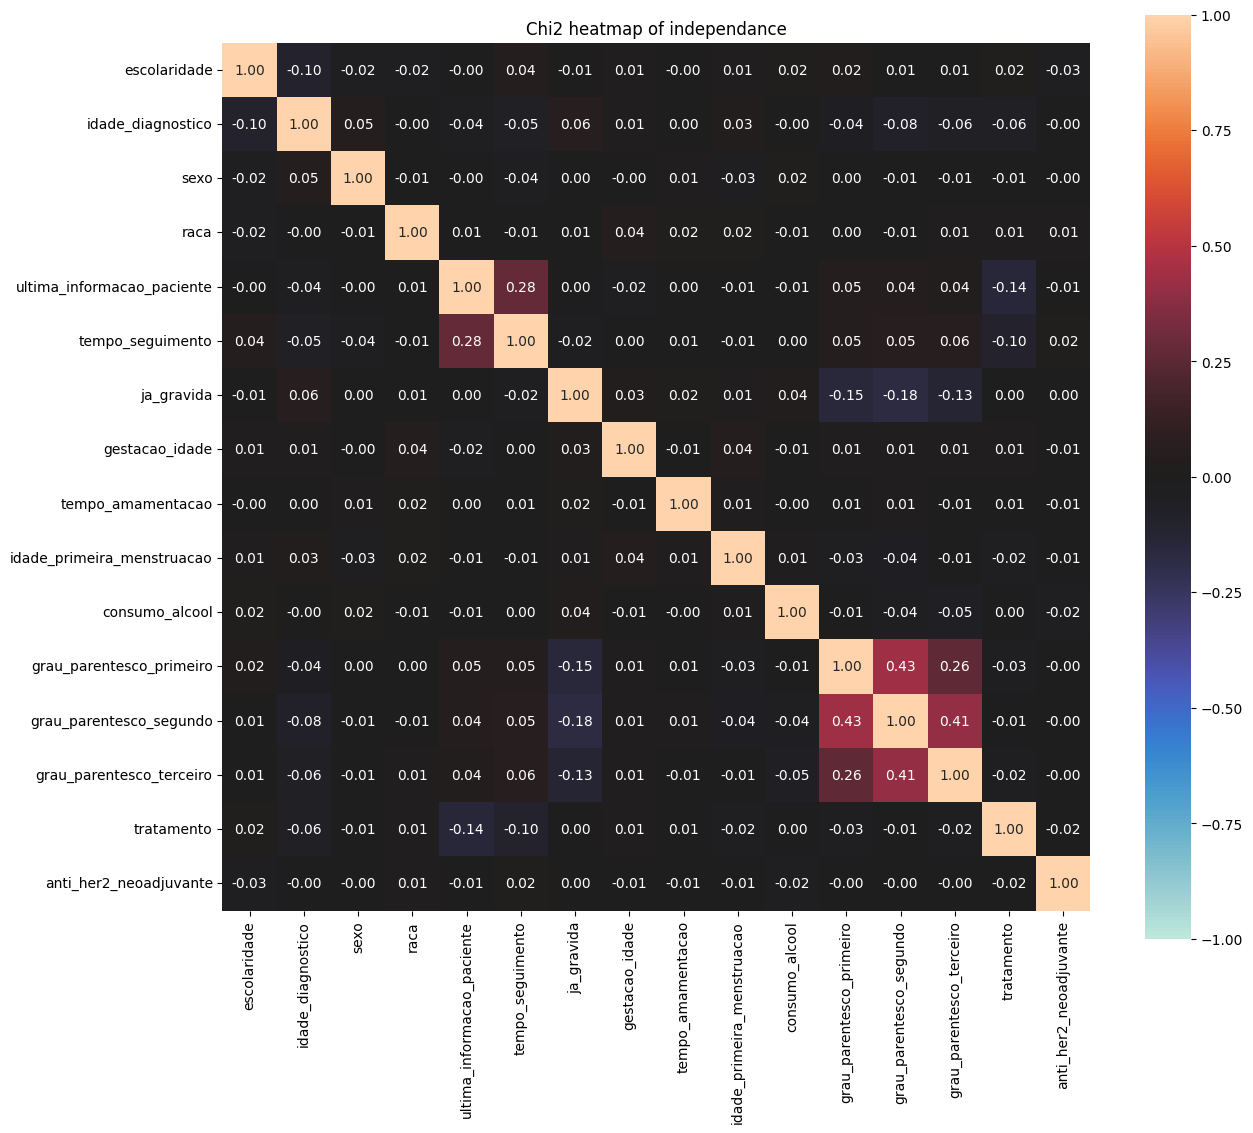

In [73]:
import matplotlib.pyplot as plt
from dython.nominal import associations
associations(df_demograficos_chi2,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

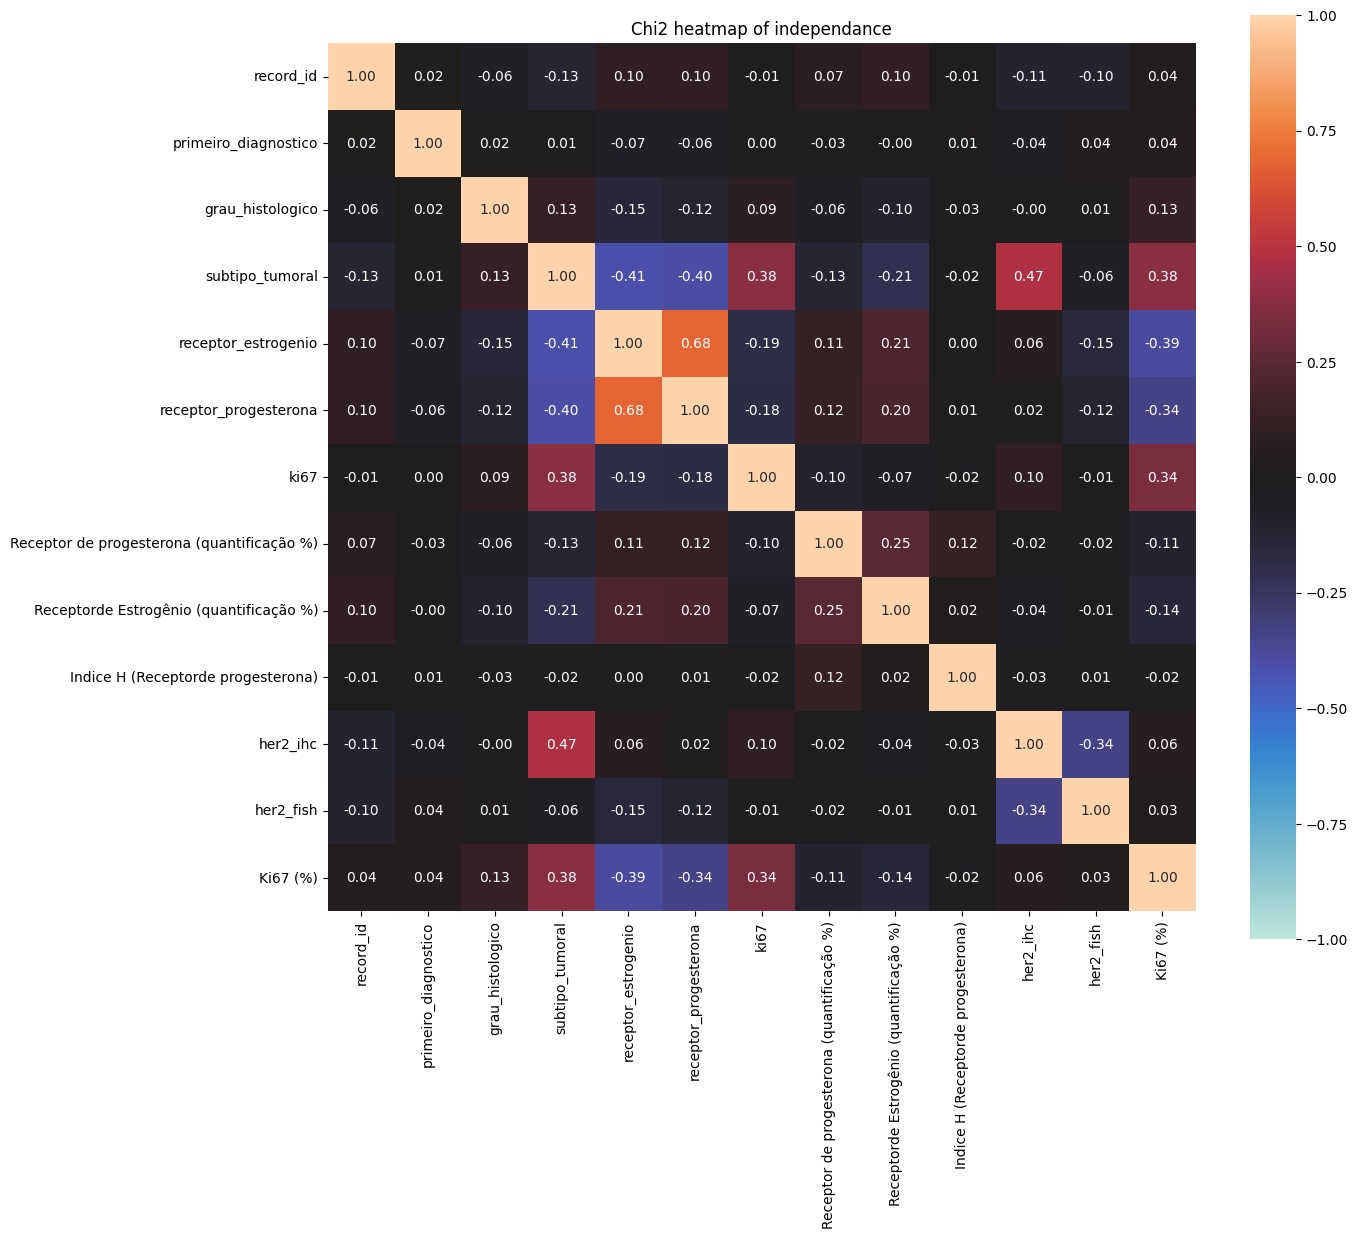

In [74]:
associations(df_histopatologia,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

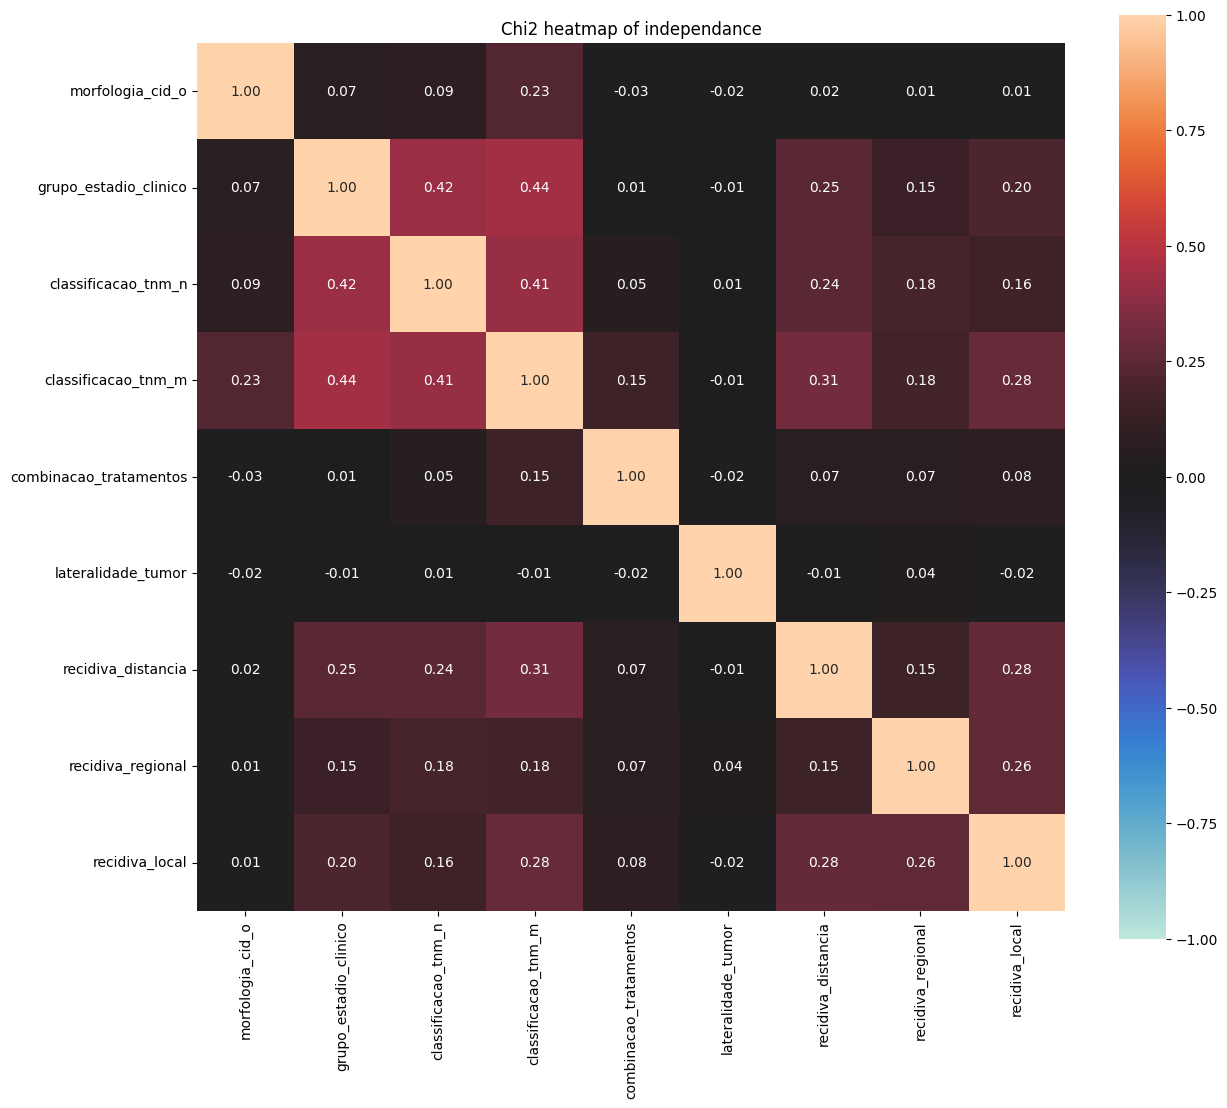

In [75]:
df_registro_tumo.describe()
df_registro_tumo_chi2 = df_registro_tumo[[
    'morfologia_cid_o','grupo_estadio_clinico','classificacao_tnm_n','classificacao_tnm_m','combinacao_tratamentos',
    'lateralidade_tumor','recidiva_distancia','recidiva_regional','recidiva_local'
]]
associations(df_registro_tumo_chi2,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

In [76]:
np.random.seed(73)

def exclui_outliers(df, col_name):
    intervalo = 3.4 * df[col_name].std()
    media = df[col_name].mean()
    lower_bound = media - intervalo
    upper_bound = media + intervalo
    df.drop(df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)].index, inplace=True)

numerical_cols = ['escolaridade', 'idade_diagnostico', 'sexo', 'raca',
       'gestacao_idade', 'tempo_amamentacao',
       'idade_primeira_menstruacao',
       'grau_parentesco_primeiro',
       'grau_parentesco_segundo', 'grau_parentesco_terceiro', 'tratamento',
       'anti_her2_neoadjuvante', 'primeiro_diagnostico', 'grau_histologico',
       'subtipo_tumoral', 'receptor_estrogenio', 'receptor_progesterona',
       'ki67', 'her2_ihc', 'her2_fish', 'morfologia_cid_o',
       'grupo_estadio_clinico', 'classificacao_tnm_n', 'classificacao_tnm_m',
       'combinacao_tratamentos', 'lateralidade_tumor',
       'recidiva_distancia',
       'recidiva_regional', 'recidiva_local',
       'primeiro_peso', 'primeira_altura',
        'ultimo_IMC', 'diferenca_peso', 'coef_peso',
        'coef_peso_tempo']

for col in numerical_cols:
  exclui_outliers(merged_df, col)

In [77]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3176 entries, 0 to 4100
Data columns (total 60 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   record_id                                   3176 non-null   int64  
 1   escolaridade                                3176 non-null   float64
 2   idade_diagnostico                           3176 non-null   float64
 3   sexo                                        3176 non-null   float64
 4   raca                                        3176 non-null   float64
 5   ultima_informacao_paciente                  3176 non-null   float64
 6   tempo_seguimento                            3176 non-null   float64
 7   ja_gravida                                  3176 non-null   float64
 8   gestacao_idade                              3176 non-null   float64
 9   tempo_amamentacao                           3176 non-null   float64
 10  grau_parentesco_m

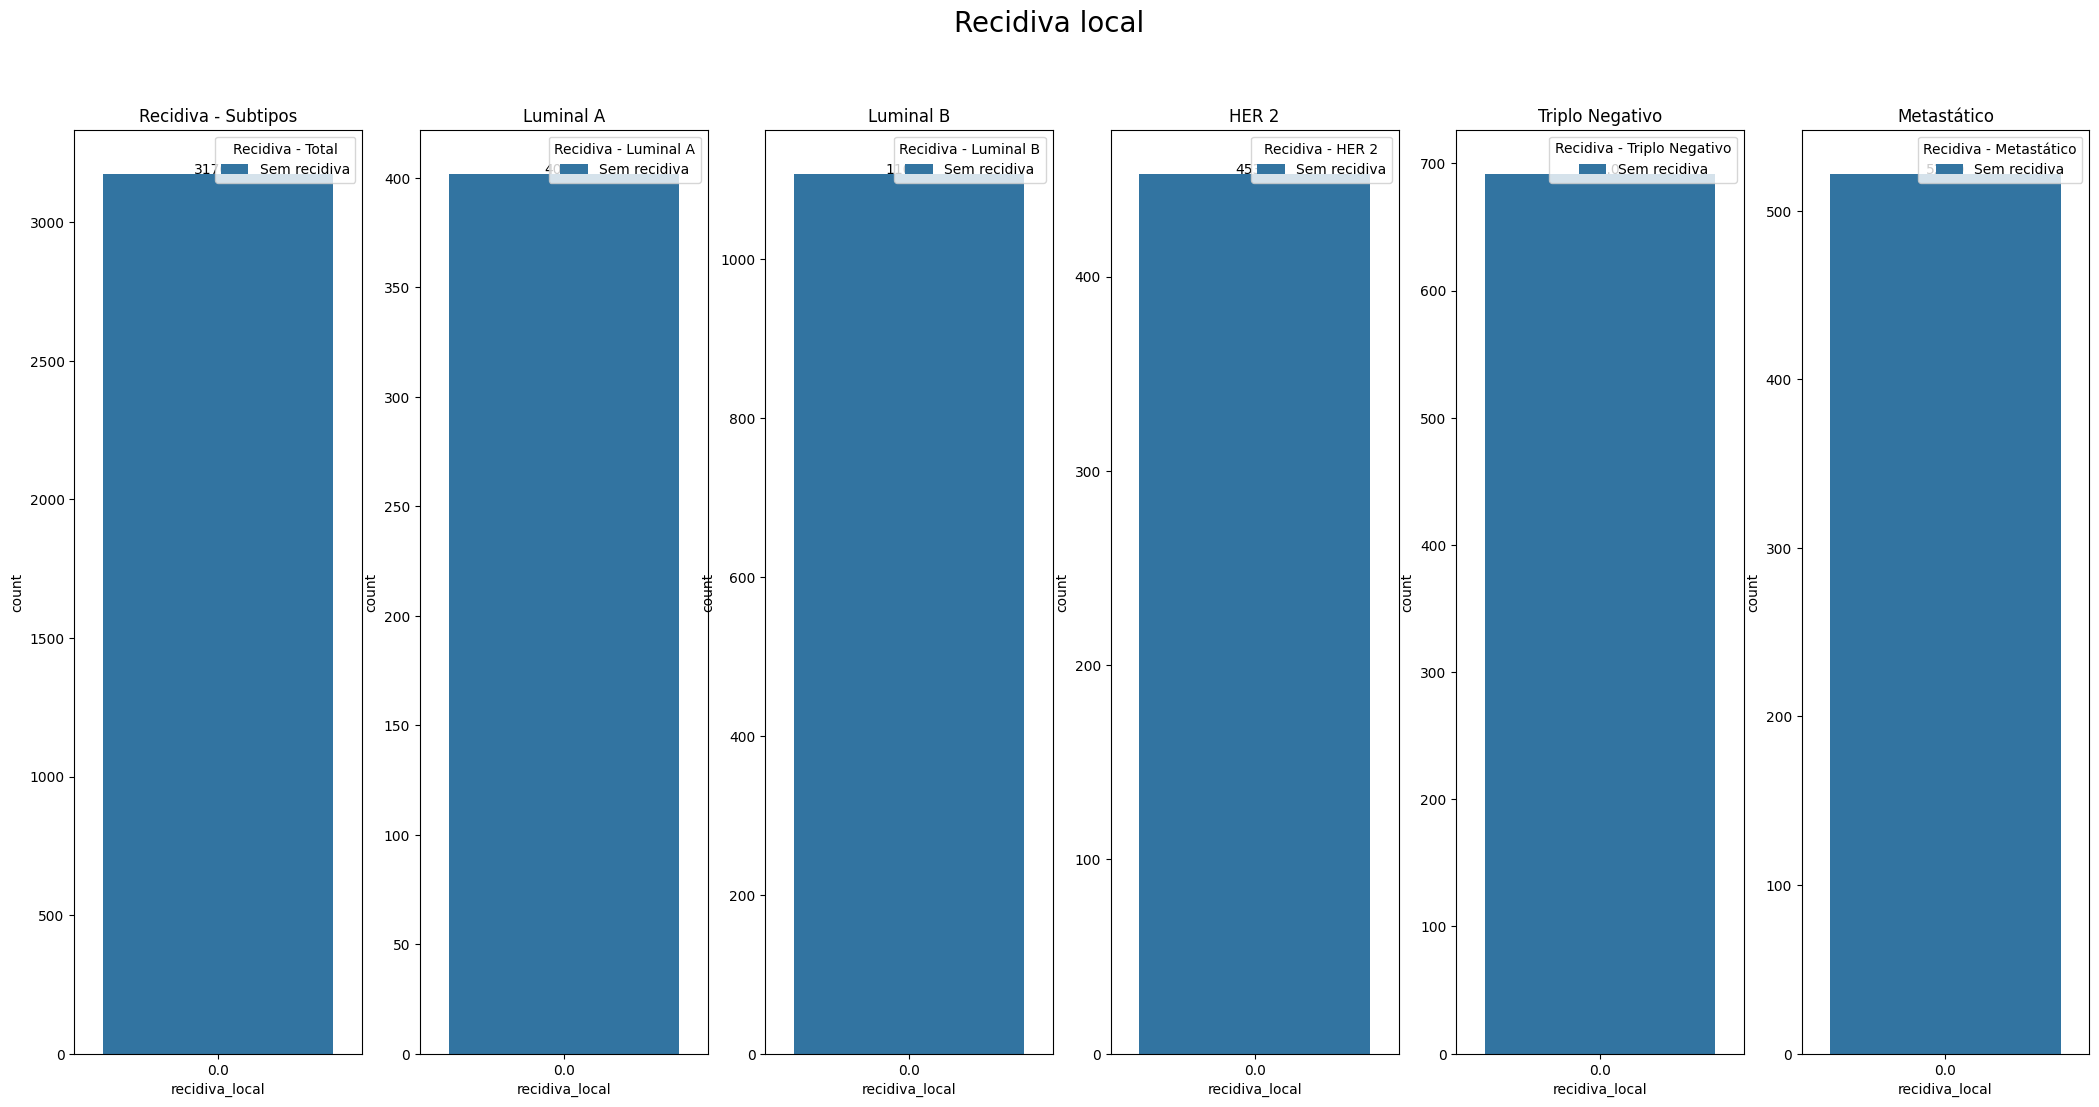

In [78]:
# Criação do grafico relacionando a recidiva local e o subtipo do tummor.

import seaborn as sns

# Definindo os parâmetro para o gráfico
tumor1 = merged_df.query('subtipo_tumoral == 1')
tumor2 = merged_df.query('subtipo_tumoral == 2')
tumor3 = merged_df.query('subtipo_tumoral == 3')
tumor4 = merged_df.query('subtipo_tumoral == 4')
tumor5 = merged_df.query('subtipo_tumoral == 5')

# Plotagem do gráfico
figura = plt.figure(figsize=(26, 12))
figura.suptitle('Recidiva local', fontsize=20)
figura.add_subplot(161)
grafico = sns.countplot(x='recidiva_local', data = merged_df)
grafico.legend(title='Recidiva - Total', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Recidiva - Subtipos')
plt.show

figura.add_subplot(162)
grafico1 = sns.countplot(x='recidiva_local', data = tumor1)
grafico1.legend(title='Recidiva - Luminal A', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal A')
plt.show

figura.add_subplot(163)
grafico2 = sns.countplot(x='recidiva_local', data = tumor2)
grafico2.legend(title='Recidiva - Luminal B', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal B')
plt.show

figura.add_subplot(164)
grafico3 = sns.countplot(x='recidiva_local', data = tumor3)
grafico3.legend(title='Recidiva - HER 2', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('HER 2')
plt.show

figura.add_subplot(165)
grafico4 = sns.countplot(x='recidiva_local', data = tumor4)
grafico4.legend(title='Recidiva - Triplo Negativo', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Triplo Negativo')
plt.show

figura.add_subplot(166)
grafico5 = sns.countplot(x='recidiva_local', data = tumor5)
grafico5.legend(title='Recidiva - Metastático', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Metastático')
plt.show

# Medindo o tamanho da coluna e colocando a quantidade de cada item no gráfico.
for i in grafico.patches:
  grafico.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico1.patches:
  grafico1.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico2.patches:
  grafico2.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico3.patches:
  grafico3.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico4.patches:
  grafico4.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico5.patches:
  grafico5.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')

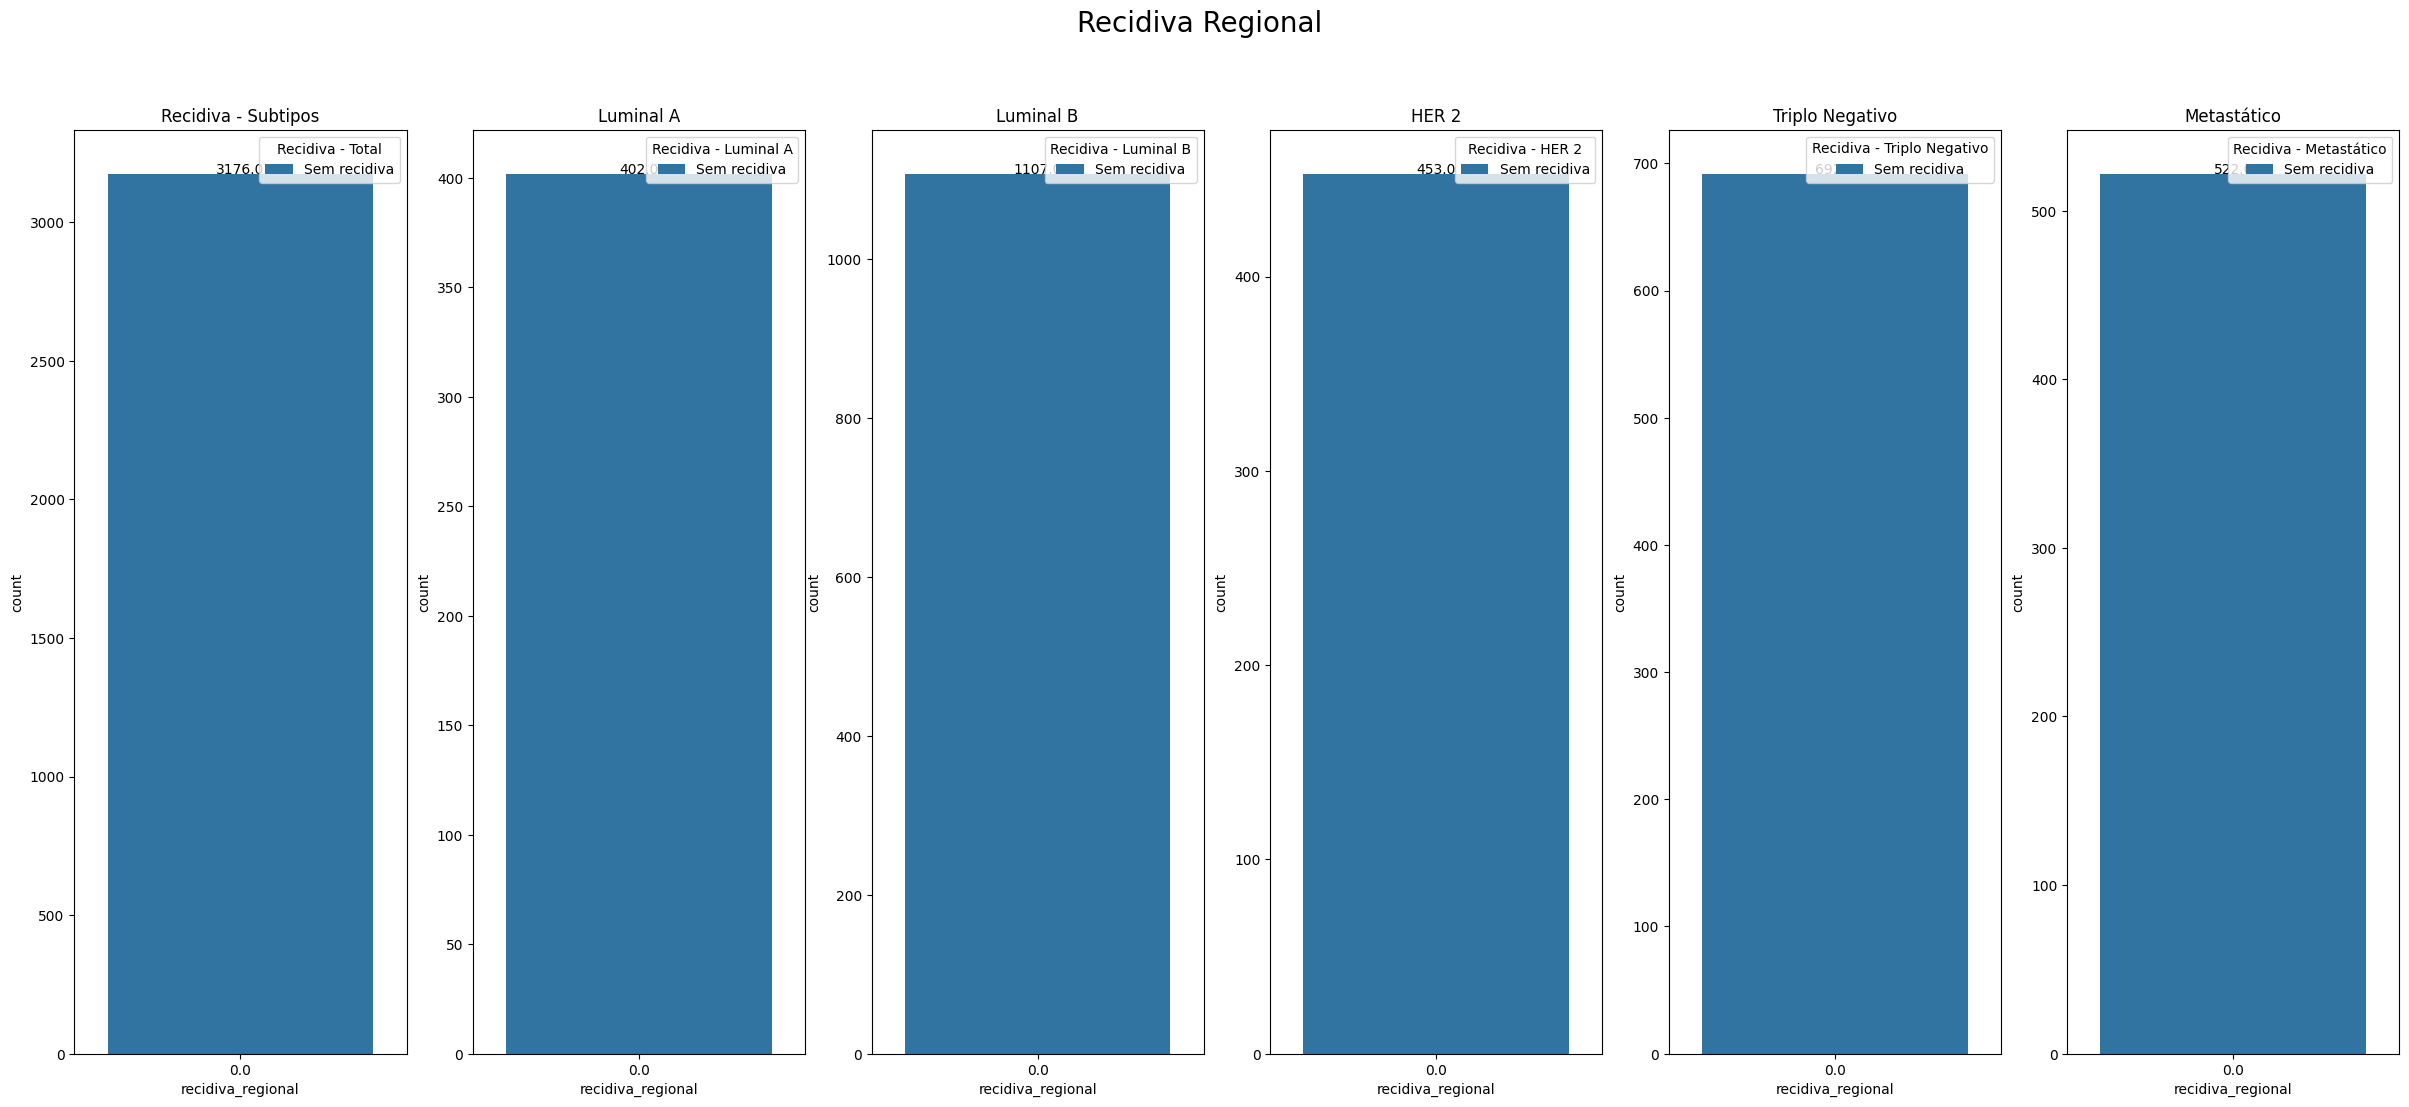

In [79]:
# Criação do grafico relacionando a recidiva regional e o subtipo do tummor.

# Plotagem do gráfico
figura = plt.figure(figsize=(30, 12))
figura.add_subplot(161)
figura.suptitle('Recidiva Regional', fontsize=20)
grafico = sns.countplot(x='recidiva_regional', data = merged_df)
grafico.legend(title='Recidiva - Total', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Recidiva - Subtipos')
plt.show

figura.add_subplot(162)
grafico1 = sns.countplot(x='recidiva_regional', data = tumor1)
grafico1.legend(title='Recidiva - Luminal A', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal A')
plt.show

figura.add_subplot(163)
grafico2 = sns.countplot(x='recidiva_regional', data = tumor2)
grafico2.legend(title='Recidiva - Luminal B', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal B')
plt.show

figura.add_subplot(164)
grafico3 = sns.countplot(x='recidiva_regional', data = tumor3)
grafico3.legend(title='Recidiva - HER 2', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('HER 2')
plt.show

figura.add_subplot(165)
grafico4 = sns.countplot(x='recidiva_regional', data = tumor4)
grafico4.legend(title='Recidiva - Triplo Negativo', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Triplo Negativo')
plt.show

figura.add_subplot(166)
grafico5 = sns.countplot(x='recidiva_regional', data = tumor5)
grafico5.legend(title='Recidiva - Metastático', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Metastático')
plt.show

# Medindo o tamanho da coluna e colocando a quantidade de cada item no gráfico.
for i in grafico.patches:
  grafico.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico1.patches:
  grafico1.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico2.patches:
  grafico2.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico3.patches:
  grafico3.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico4.patches:
  grafico4.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico5.patches:
  grafico5.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')

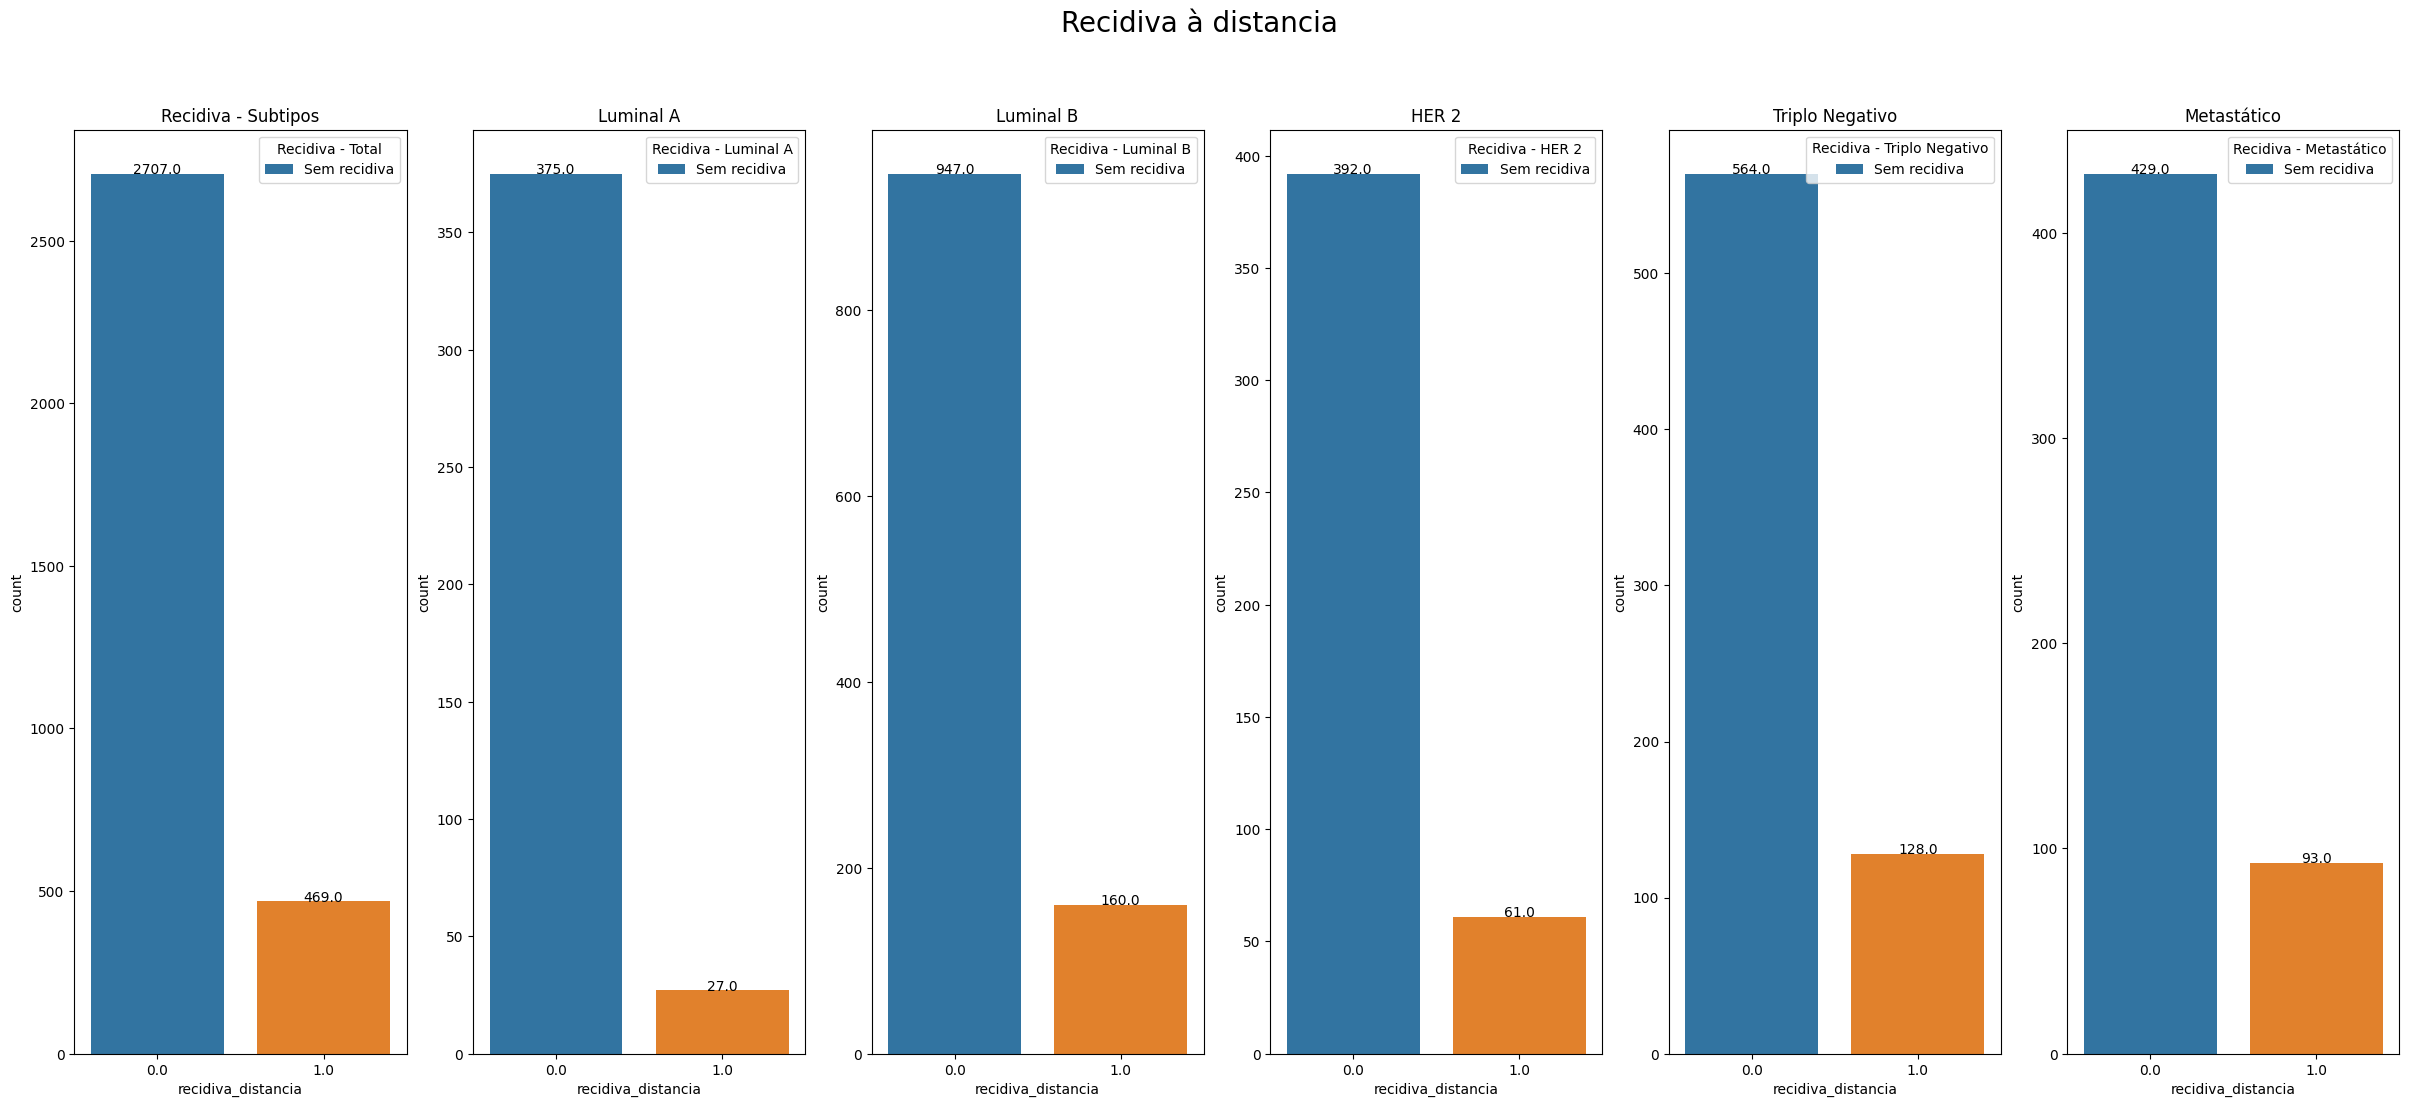

In [80]:
# Criação do grafico relacionando a recidiva à distância e o subtipo do tummor.

# Plotagem do gráfico
figura = plt.figure(figsize=(30, 12))
figura.add_subplot(161)
figura.suptitle('Recidiva à distancia', fontsize=20)
grafico = sns.countplot(x='recidiva_distancia', data = merged_df)
grafico.legend(title='Recidiva - Total', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Recidiva - Subtipos')
plt.show

figura.add_subplot(162)
grafico1 = sns.countplot(x='recidiva_distancia', data = tumor1)
grafico1.legend(title='Recidiva - Luminal A', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal A')
plt.show

figura.add_subplot(163)
grafico2 = sns.countplot(x='recidiva_distancia', data = tumor2)
grafico2.legend(title='Recidiva - Luminal B', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal B')
plt.show

figura.add_subplot(164)
grafico3 = sns.countplot(x='recidiva_distancia', data = tumor3)
grafico3.legend(title='Recidiva - HER 2', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('HER 2')
plt.show

figura.add_subplot(165)
grafico4 = sns.countplot(x='recidiva_distancia', data = tumor4)
grafico4.legend(title='Recidiva - Triplo Negativo', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Triplo Negativo')
plt.show

figura.add_subplot(166)
grafico5 = sns.countplot(x='recidiva_distancia', data = tumor5)
grafico5.legend(title='Recidiva - Metastático', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Metastático')
plt.show

# Medindo o tamanho da coluna e colocando a quantidade de cada item no gráfico.
for i in grafico.patches:
  grafico.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico1.patches:
  grafico1.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico2.patches:
  grafico2.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico3.patches:
  grafico3.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico4.patches:
  grafico4.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico5.patches:
  grafico5.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')

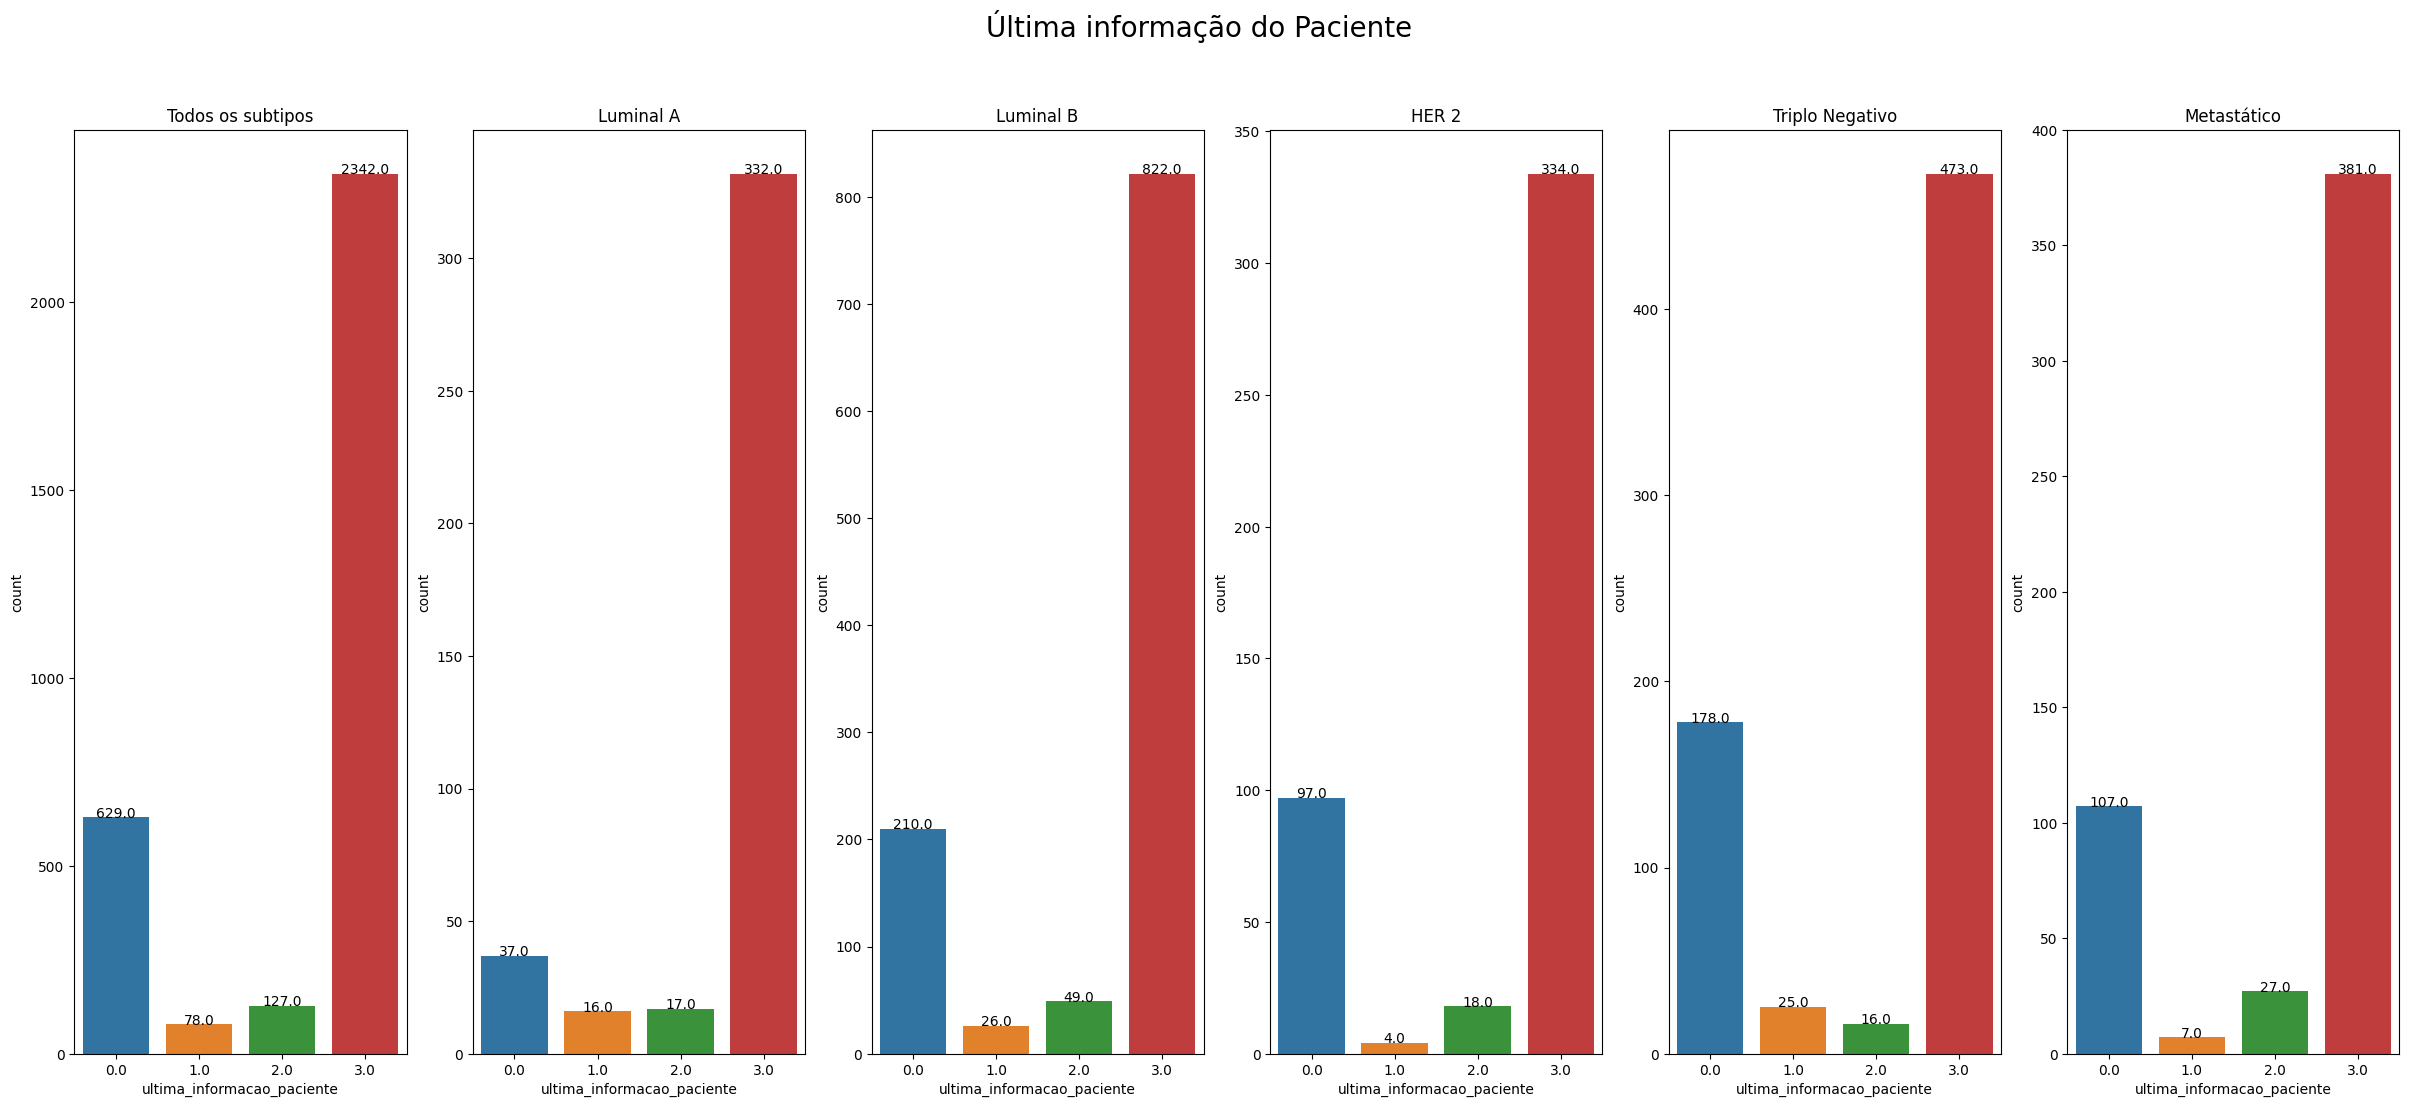

In [81]:
# Criação do grafico relacionando a última informação do paciente e o subtipo do tummor.

# Plotagem do gráfico
figura = plt.figure(figsize=(30, 12))
figura.add_subplot(161)
figura.suptitle('Última informação do Paciente', fontsize=20)
grafico = sns.countplot(x='ultima_informacao_paciente', data = merged_df)
plt.title('Todos os subtipos')
plt.show

figura.add_subplot(162)
grafico1 = sns.countplot(x='ultima_informacao_paciente', data = tumor1)
plt.title('Luminal A')
plt.show

figura.add_subplot(163)
grafico2 = sns.countplot(x='ultima_informacao_paciente', data = tumor2)
plt.title('Luminal B')
plt.show

figura.add_subplot(164)
grafico3 = sns.countplot(x='ultima_informacao_paciente', data = tumor3)
plt.title('HER 2')
plt.show

figura.add_subplot(165)
grafico4 = sns.countplot(x='ultima_informacao_paciente', data = tumor4)
plt.title('Triplo Negativo')
plt.show

figura.add_subplot(166)
grafico5 = sns.countplot(x='ultima_informacao_paciente', data = tumor5)
plt.title('Metastático')
plt.show

# Medindo o tamanho da coluna e colocando a quantidade de cada item no gráfico.
for i in grafico.patches:
  grafico.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico1.patches:
  grafico1.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico2.patches:
  grafico2.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico3.patches:
  grafico3.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico4.patches:
  grafico4.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico5.patches:
  grafico5.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')

In [82]:
merged_df.columns

Index(['record_id', 'escolaridade', 'idade_diagnostico', 'sexo', 'raca',
       'ultima_informacao_paciente', 'tempo_seguimento', 'ja_gravida',
       'gestacao_idade', 'tempo_amamentacao',
       'grau_parentesco_mama_primeiro_1_vez',
       'grau_parentesco_mama_primeiro_mais_vezes',
       'grau_parentesco_mama_segundo_1_vez',
       'grau_parentesco_mama_segundo_mais_vezes', 'idade_primeira_menstruacao',
       'uso_anticoncepcional', 'atividade_fisica', 'consumo_alcool',
       'grau_parentesco_primeiro', 'grau_parentesco_segundo',
       'grau_parentesco_terceiro', 'tratamento', 'anti_her2_neoadjuvante',
       'primeiro_diagnostico', 'grau_histologico', 'subtipo_tumoral',
       'receptor_estrogenio', 'receptor_progesterona', 'ki67',
       'Receptor de progesterona (quantificação %)',
       'Receptorde Estrogênio (quantificação %)',
       'Indice H (Receptorde progesterona)', 'her2_ihc', 'her2_fish',
       'Ki67 (%)', 'cid_o', 'morfologia_cid_o', 'estadio_clinico',
       'g

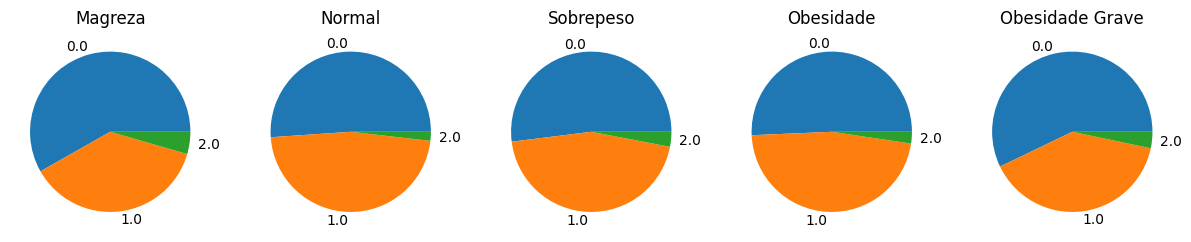

'\nAqui podemos observar que o Índice de Massa Corporal (IMC) influencia no tipo de tratamento escolhido. Quanto maior o IMC,\nmaior a probabilidade de o tratamento ser neoadjuvante, o que faz sentido, pois a cirurgia é mais difícil de ser realizada\nem pessoas com maior índice de gordura corporal.\n'

In [83]:
'''
Aqui podemos observar que o Índice de Massa Corporal (IMC) influencia no tipo de tratamento escolhido.
'''

# Dividindo a figura em 1 linha e 5 colunas para os subplots
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Definindo os dados e rótulos para cada faixa de IMC
magreza = merged_df.query("primeiro_IMC < 18.5")
normal = merged_df.query("primeiro_IMC < 24.9 and primeiro_IMC > 18.5")
sobrepeso = merged_df.query("primeiro_IMC < 29.9 and primeiro_IMC > 24.9")
obesidade = merged_df.query("primeiro_IMC < 39.9 and primeiro_IMC > 29.9")
obesidade_grave = merged_df.query("primeiro_IMC > 39.9")

counts = magreza['tratamento'].value_counts()
counts2 = normal['tratamento'].value_counts()
counts3 = sobrepeso['tratamento'].value_counts()
counts4 = obesidade['tratamento'].value_counts()
counts5 = obesidade_grave['tratamento'].value_counts()

# Plotando os gráficos de pizza em cada subplot
axs[0].pie(counts, labels=counts.index)
axs[0].set_title('Magreza')

axs[1].pie(counts2, labels=counts2.index)
axs[1].set_title('Normal')

axs[2].pie(counts3, labels=counts3.index)
axs[2].set_title('Sobrepeso')

axs[3].pie(counts4, labels=counts4.index)
axs[3].set_title('Obesidade')

axs[4].pie(counts5, labels=counts5.index)
axs[4].set_title('Obesidade Grave')

plt.show()

'''
Aqui podemos observar que o Índice de Massa Corporal (IMC) influencia no tipo de tratamento escolhido. Quanto maior o IMC,
maior a probabilidade de o tratamento ser neoadjuvante, o que faz sentido, pois a cirurgia é mais difícil de ser realizada
em pessoas com maior índice de gordura corporal.
'''

'\nEssa hipótese foi confirmada de acordo com o gráfico abaixo, uma vez que a tendência do tempo\nde seguimento é aumentar quanto maior o nível de escolaridade, com uma diminuição de variação\na partir do EF completo.\n'

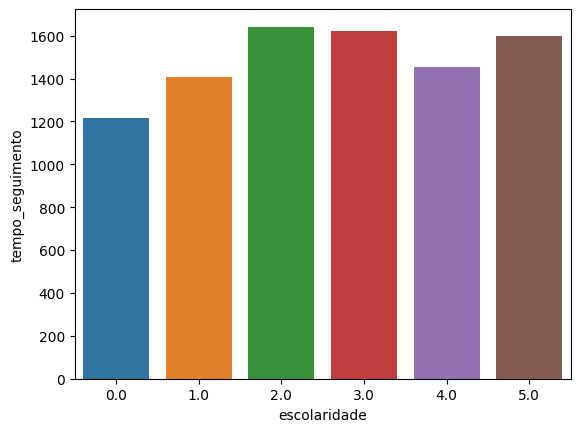

In [84]:
'''
A escolaridade pode influenciar o tempo de seguimento do tratamento
'''
# calculando a média dos valores de tempo_seguimento para cada nível de escolaridade
media_por_escolaridade = merged_df.groupby('escolaridade')['tempo_seguimento'].mean().reset_index()

# plotando o histograma
sns.barplot(data=media_por_escolaridade, x='escolaridade', y='tempo_seguimento')

'''
Essa hipótese foi confirmada de acordo com o gráfico abaixo, uma vez que a tendência do tempo
de seguimento é aumentar quanto maior o nível de escolaridade, com uma diminuição de variação
a partir do EF completo.
'''

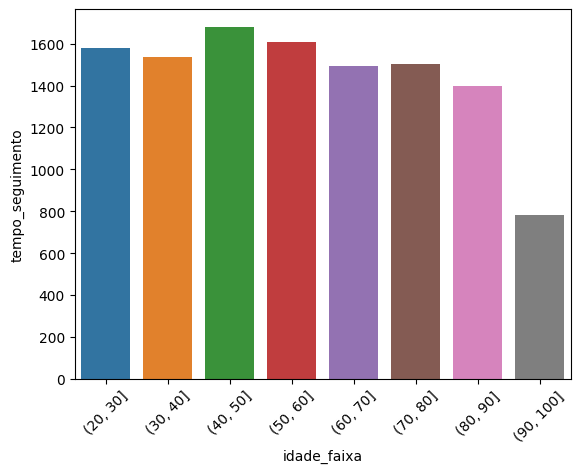

'\nDe acordo com o gráfico abaixo, existe uma tendência de que quanto mais velho o paciente,\nmenor será o tempo de seguimento.\n'

In [85]:
'''
A idade do paciente pode afetar a duração do acompanhamento
'''

# Criando a coluna com as faixas de idade
merged_df['idade_faixa'] = pd.cut(merged_df['idade_diagnostico'], bins=range(20, 101, 10))

# Agrupando por faixa de idade e calculando a média do tempo de seguimento
media_por_faixa = merged_df.groupby('idade_faixa')['tempo_seguimento'].mean().reset_index()

# Plotando o gráfico de barras
sns.barplot(data=media_por_faixa, x='idade_faixa', y='tempo_seguimento')
plt.xticks(rotation=45)
plt.show()

'''
De acordo com o gráfico abaixo, existe uma tendência de que quanto mais velho o paciente,
menor será o tempo de seguimento.
'''

In [86]:
merged_df

,record_id,escolaridade,idade_diagnostico,sexo,raca,ultima_informacao_paciente,tempo_seguimento,ja_gravida,gestacao_idade,tempo_amamentacao,...,primeira_altura,primeiro_IMC,ultimo_peso,ultima_altura,ultimo_IMC,diferenca_peso,coef_peso,diferenca_tempo,coef_peso_tempo,idade_faixa
0,302,1.0,51.0,0.0,3.0,0.0,2225.0,1.0,21.0,23.0,...,158.0,23.153341,64.900000,158.000000,25.997436,7.100000,1.122837,1602.0,0.004432,"(50, 60]"
2,752,1.0,56.0,0.0,2.0,3.0,4153.0,1.0,29.0,39.0,...,152.0,36.357341,85.900000,152.000000,37.179709,1.900000,1.022619,1455.0,0.001306,"(50, 60]"
4,1589,2.0,42.0,0.0,4.0,3.0,3290.0,1.0,23.0,8.0,...,167.0,22.661264,63.650000,167.000000,22.822618,0.450000,1.007120,1616.0,0.000278,"(40, 50]"
6,1843,5.0,52.0,0.0,0.0,2.0,182.0,1.0,24.0,2.0,...,146.0,25.333083,60.200000,147.000000,27.858763,6.200000,1.114815,4626.0,0.001340,"(50, 60]"
7,1873,5.0,40.0,0.0,1.0,3.0,3234.0,1.0,28.0,57.0,...,148.0,26.479182,55.000000,150.000000,24.444444,-3.000000,0.948276,1341.0,-0.002237,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,78798,3.0,69.0,0.0,1.0,3.0,875.0,1.0,32.0,32.0,...,175.0,24.669388,62.741254,175.000000,20.486940,-8.146132,1.157190,752.0,0.000000,"(60, 70]"
4068,78802,5.0,60.0,0.0,1.0,3.0,859.0,1.0,22.0,20.0,...,153.0,31.184587,82.350000,153.000000,35.178777,9.350000,1.128082,2685.0,0.003482,"(50, 60]"
4069,78806,0.0,47.0,0.0,0.0,3.0,873.0,1.0,25.0,18.0,...,155.0,47.388137,43.984504,152.649448,18.875968,5.319810,0.920182,0.0,0.000000,"(40, 50]"
4070,78842,3.0,50.0,0.0,1.0,3.0,869.0,1.0,22.0,3.0,...,158.0,22.832879,57.000000,158.000000,22.832879,0.000000,1.000000,0.0,0.000000,"(40, 50]"


In [88]:
caminho_arquivo = '/content/drive/MyDrive/Data/merged_df.csv'
merged_df.to_csv(caminho_arquivo, index=False)